# Plot the result of LIME, DeepShap, Integrated Gradients by angles and pixels

In [1]:
from utils.utils import *
import numpy as np
import matplotlib.pyplot as plt
import os

# Create the path to save the results
os.makedirs('XAI_plot', exist_ok=True)
os.makedirs('XAI_ranking', exist_ok=True)

In [2]:
# Method to normalize the data
def normalization(data):
    return (data-np.min(data))/(np.max(data)-np.min(data))

# LIME

### Load the result of XAI for LIME for three nets and do the normalization

In [3]:
attrs_0_ResNet = np.mean(np.abs(np.load("./XAI_value/lime_tdvscp_weight_ResNet_0.npy")),axis=0)
attrs_1_ResNet = np.mean(np.abs(np.load("./XAI_value/lime_tdvscp_weight_ResNet_1.npy")),axis=0)
attrs_ResNet = attrs_0_ResNet+attrs_1_ResNet

attrs_0_LSTM = np.mean(np.abs(np.load("./XAI_value/lime_tdvscp_weight_lstm_0.npy")),axis=0)
attrs_1_LSTM = np.mean(np.abs(np.load("./XAI_value/lime_tdvscp_weight_lstm_1.npy")),axis=0)
attrs_LSTM = attrs_0_LSTM+attrs_1_LSTM

attrs_0_InceptionTime = np.mean(np.abs(np.load("./XAI_value/lime_tdvscp_weight_InceptionTime_0.npy")),axis=0)
attrs_1_InceptionTime = np.mean(np.abs(np.load("./XAI_value/lime_tdvscp_weight_InceptionTime_1.npy")),axis=0)
attrs_InceptionTime = attrs_0_InceptionTime+attrs_1_InceptionTime

attrs_ResNet_norm = normalization(attrs_ResNet)
attrs_0_ResNet_norm = normalization(attrs_0_ResNet)
attrs_1_ResNet_norm = normalization(attrs_1_ResNet)

attrs_LSTM_norm = normalization(attrs_LSTM)
attrs_0_LSTM_norm = normalization(attrs_0_LSTM)
attrs_1_LSTM_norm = normalization(attrs_1_LSTM)

attrs_InceptionTime_norm = normalization(attrs_InceptionTime)
attrs_0_InceptionTime_norm = normalization(attrs_0_InceptionTime)
attrs_1_InceptionTime_norm = normalization(attrs_1_InceptionTime)

attrs_ResNet_norm_angle = normalization(np.mean(attrs_ResNet_norm,axis=1))
attrs_0_ResNet_norm_angle = normalization(np.mean(attrs_0_ResNet_norm,axis=1))
attrs_1_ResNet_norm_angle = normalization(np.mean(attrs_1_ResNet_norm,axis=1))

attrs_LSTM_norm_angle = normalization(np.mean(attrs_LSTM_norm,axis=1))
attrs_0_LSTM_norm_angle = normalization(np.mean(attrs_0_LSTM_norm,axis=1))
attrs_1_LSTM_norm_angle = normalization(np.mean(attrs_1_LSTM_norm,axis=1))

attrs_InceptionTime_norm_angle = normalization(np.mean(attrs_InceptionTime_norm,axis=1))
attrs_0_InceptionTime_norm_angle = normalization(np.mean(attrs_0_InceptionTime_norm,axis=1))
attrs_1_InceptionTime_norm_angle = normalization(np.mean(attrs_1_InceptionTime_norm,axis=1))

### Add the name of the angles and basic information for plot the results

In [4]:
ranking = np.array(['F/E Pelvis - first side',
'Ab/Ad Pelvis - first side',
'Rot I/E Pelvis - first side',
'F/E Hip - first side',
'Ab/Ad Hip - first side',
'Rot I/E Hip - first side',
'F/E Knee - first side',
'Ab/Ad Knee - first side',
'Rot I/E Knee - first side',
'F/E Ankle - first side',
'Rot I/E Foot - first side',
'F/E Pelvis - second side',
'Ab/Ad Pelvis - second side',
'Rot I/E Pelvis - second side',
'F/E Hip - second side',
'Ab/Ad Hip - second side',
'Rot I/E Hip - second side',
'F/E Knee - second side',
'Ab/Ad Knee - second side',
'Rot I/E Knee - second side',
'F/E Ankle - second side',
'Rot I/E Foot - second side'])  

XAI_method = 'LIME'
labels= ['TD','CPu','Total'] 
Net_name = ['ResNet','LSTM','InceptionTime']
D_name = 'TDvsCPu'
list_rel_nets = [[attrs_0_ResNet_norm_angle,attrs_1_ResNet_norm_angle,np.abs(attrs_0_ResNet_norm_angle)+np.abs(attrs_1_ResNet_norm_angle)], [attrs_0_LSTM_norm_angle,attrs_1_LSTM_norm_angle,np.abs(attrs_0_LSTM_norm_angle)+np.abs(attrs_1_LSTM_norm_angle)], [attrs_0_InceptionTime_norm_angle,attrs_1_InceptionTime_norm_angle,np.abs(attrs_0_InceptionTime_norm_angle)+np.abs(attrs_1_InceptionTime_norm_angle)]]

### Average the normalized XAI results by angles and plot & save

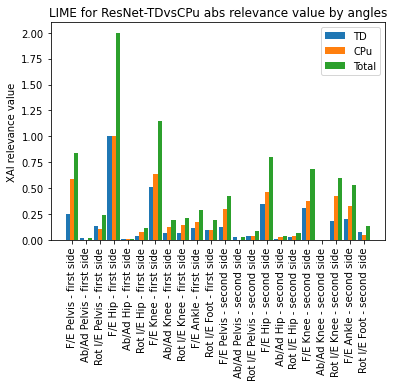

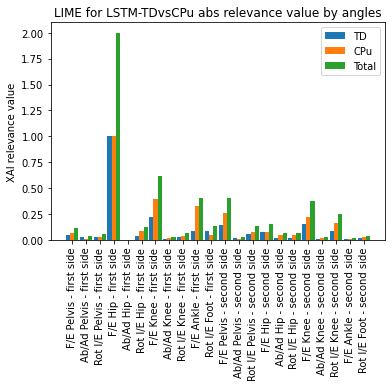

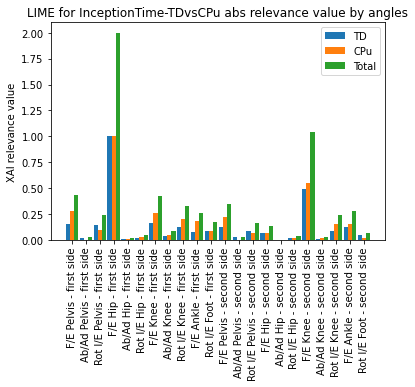

In [5]:
for idx_Net, Net in enumerate(Net_name):
    list_rel = list_rel_nets[idx_Net]
    width = 0.3
    multiplier = -0.3

    for idx, i in enumerate(list_rel):

        plt.bar(np.arange(22)+np.ones(22)*multiplier , np.abs(i), width,label=labels[idx])
        multiplier += 0.3

    plt.xticks(range(22),ranking,rotation=90)
    plt.ylabel('XAI relevance value')
    plt.legend()
    plt.title(str(XAI_method)+' for '+str(Net)+'-'+str(D_name)+' abs relevance value by angles')

    path_img = './XAI_plot/'
    save=str(XAI_method)+'_'+str(Net)+'_'+str(D_name)+'_angles'
    plt.savefig(path_img+save,bbox_inches = 'tight',facecolor ="w",dpi=1000)
    plt.show()

### Plot and save the XAI results by pixels 

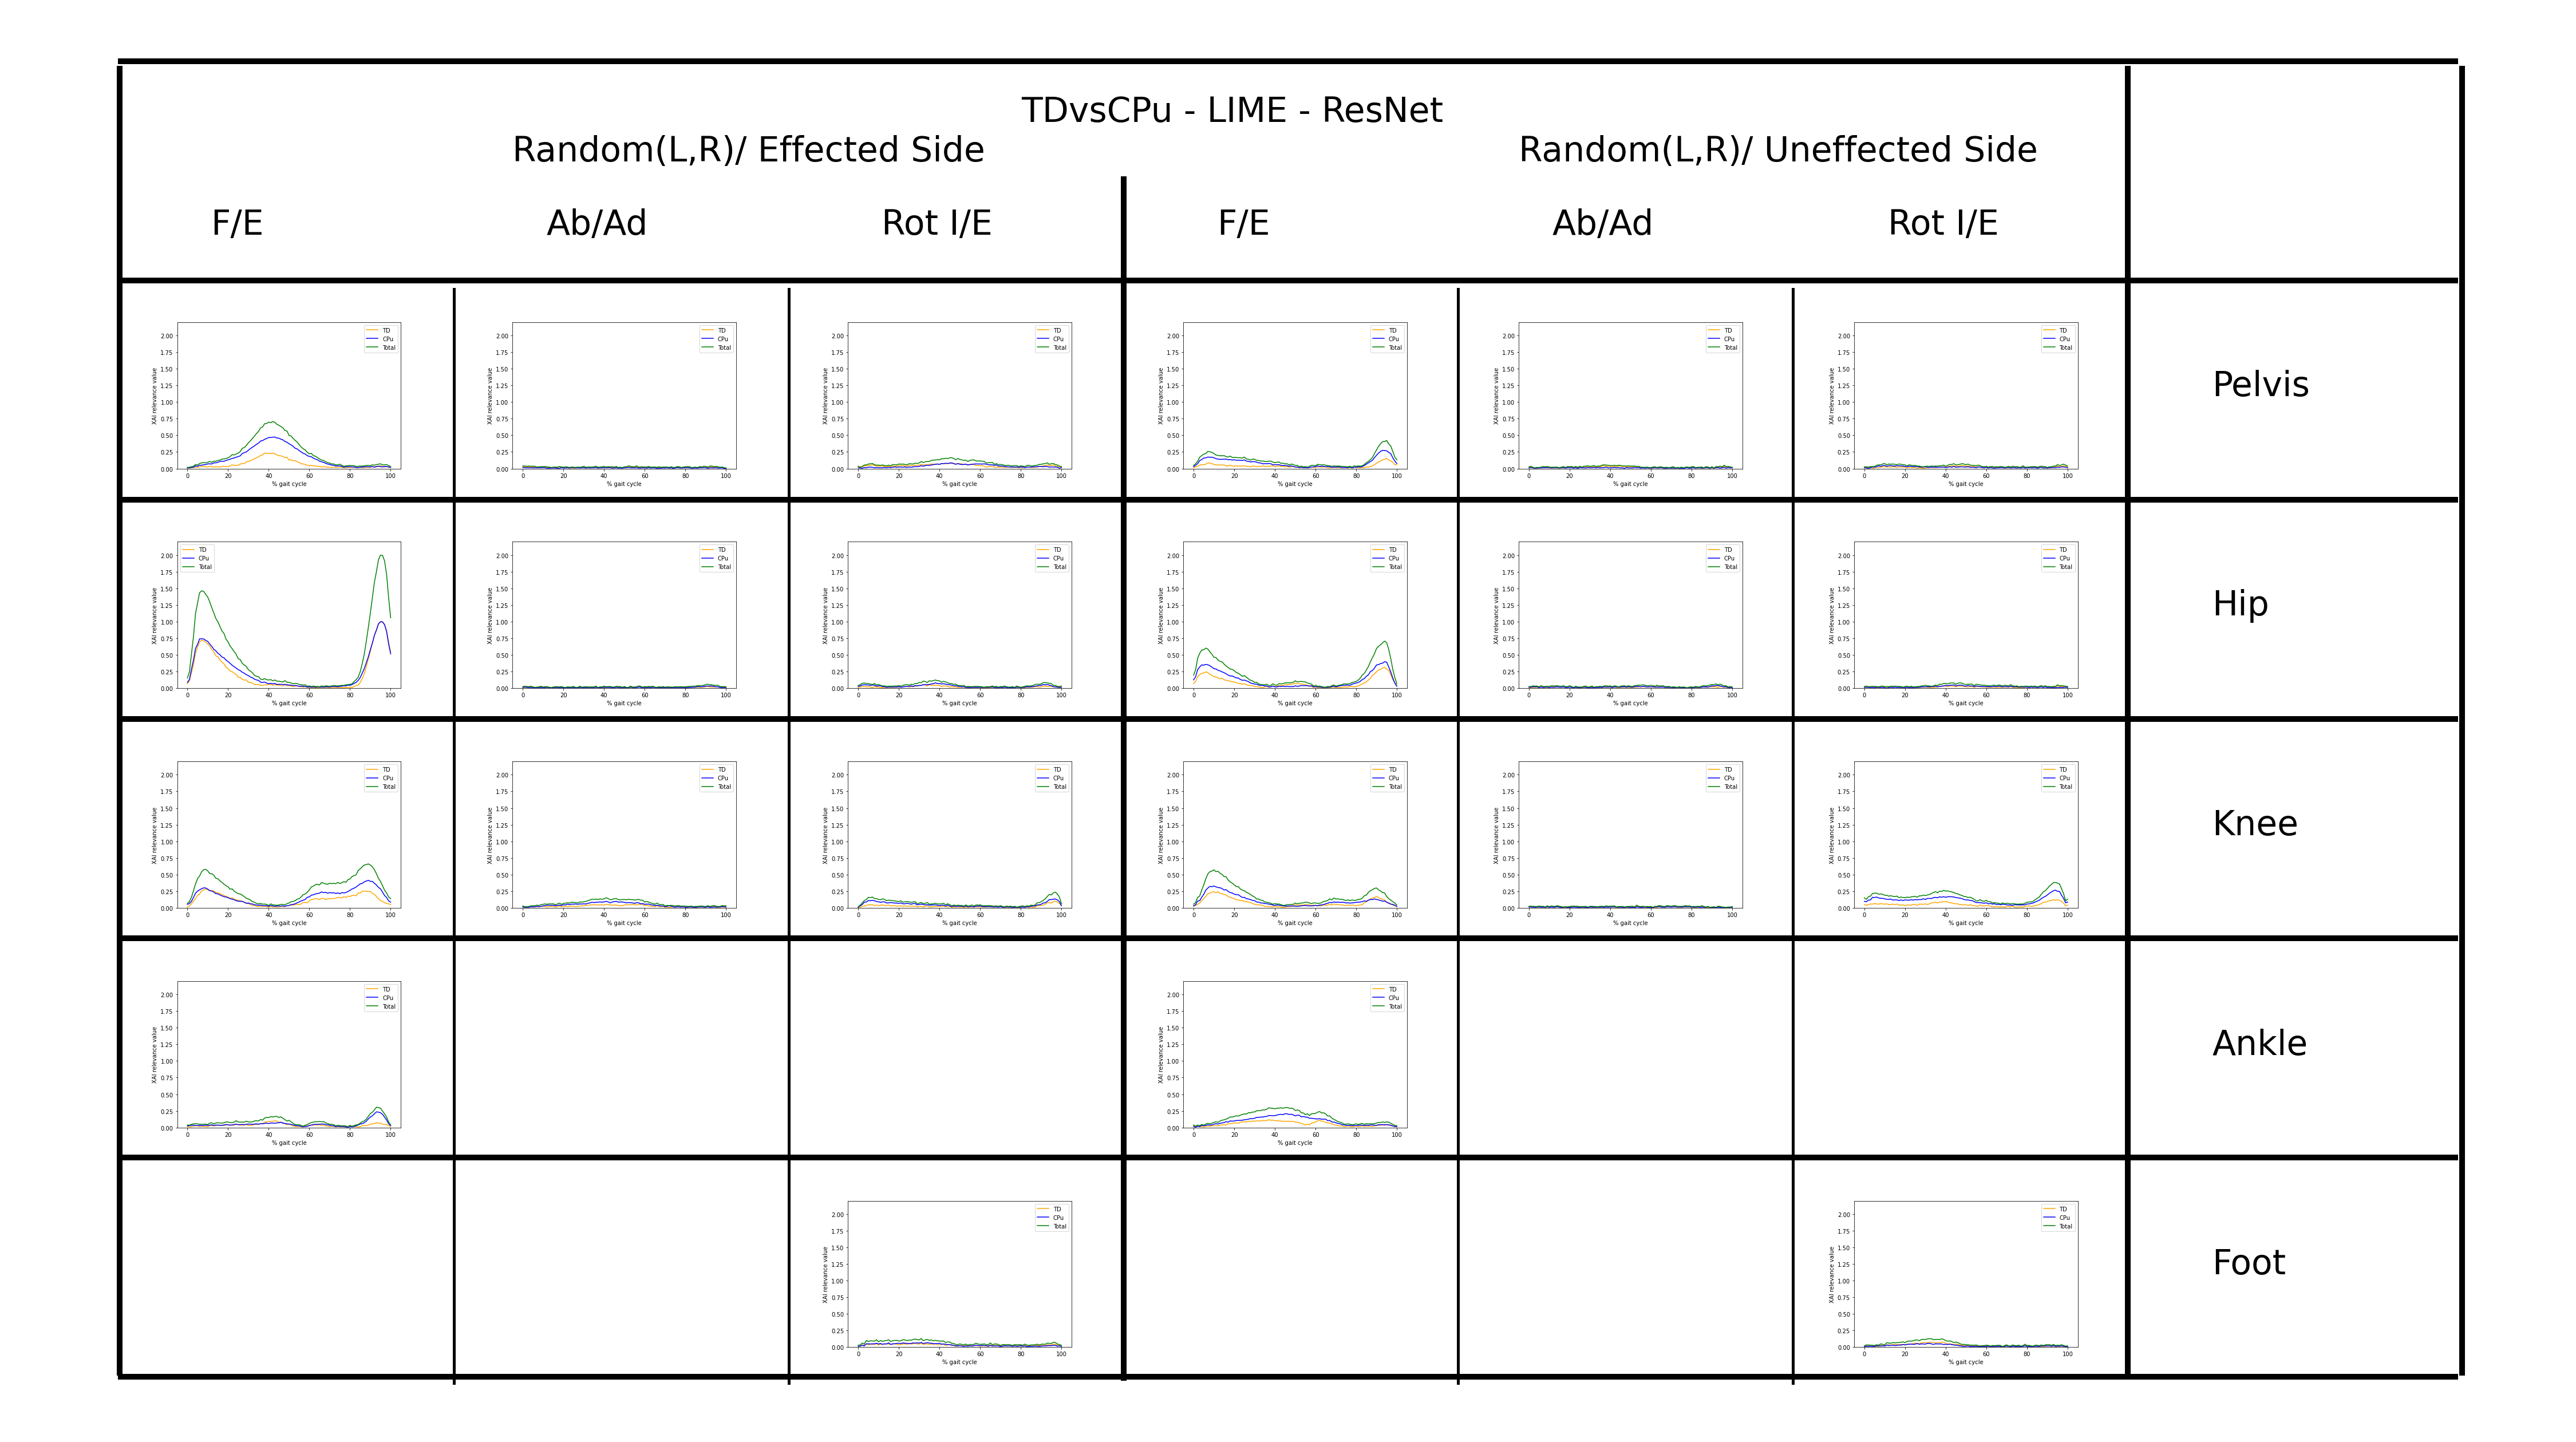

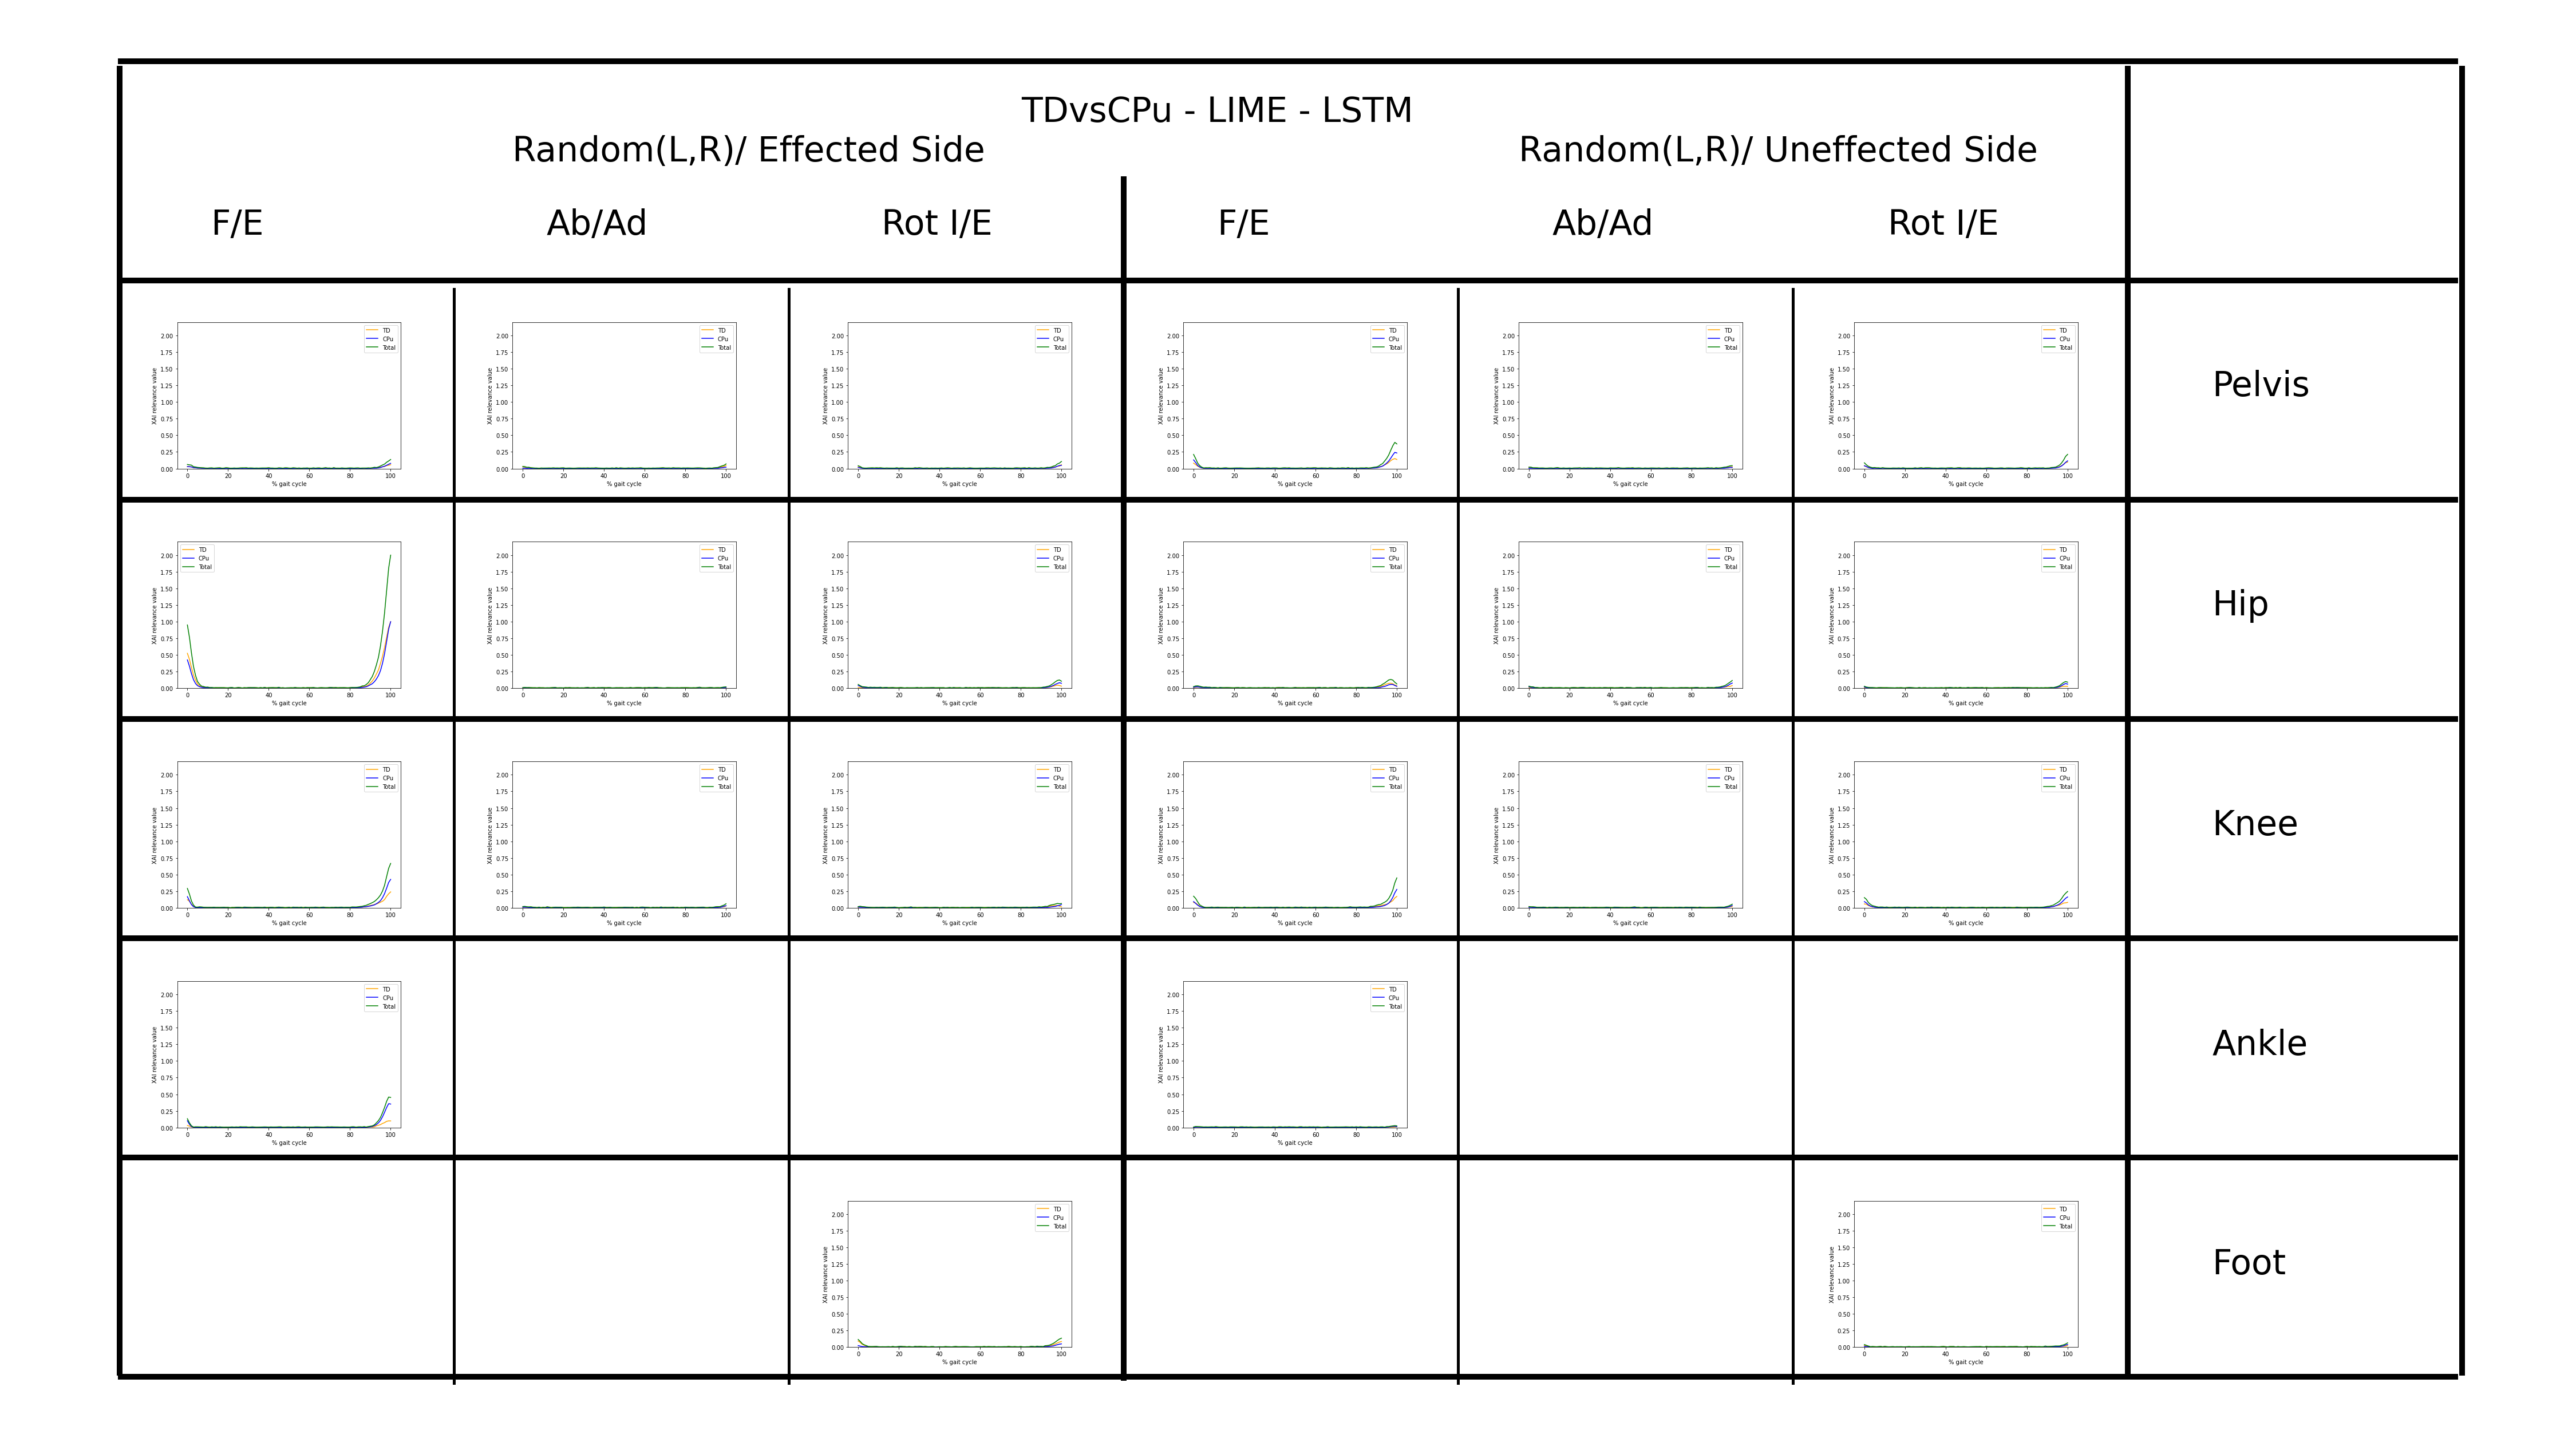

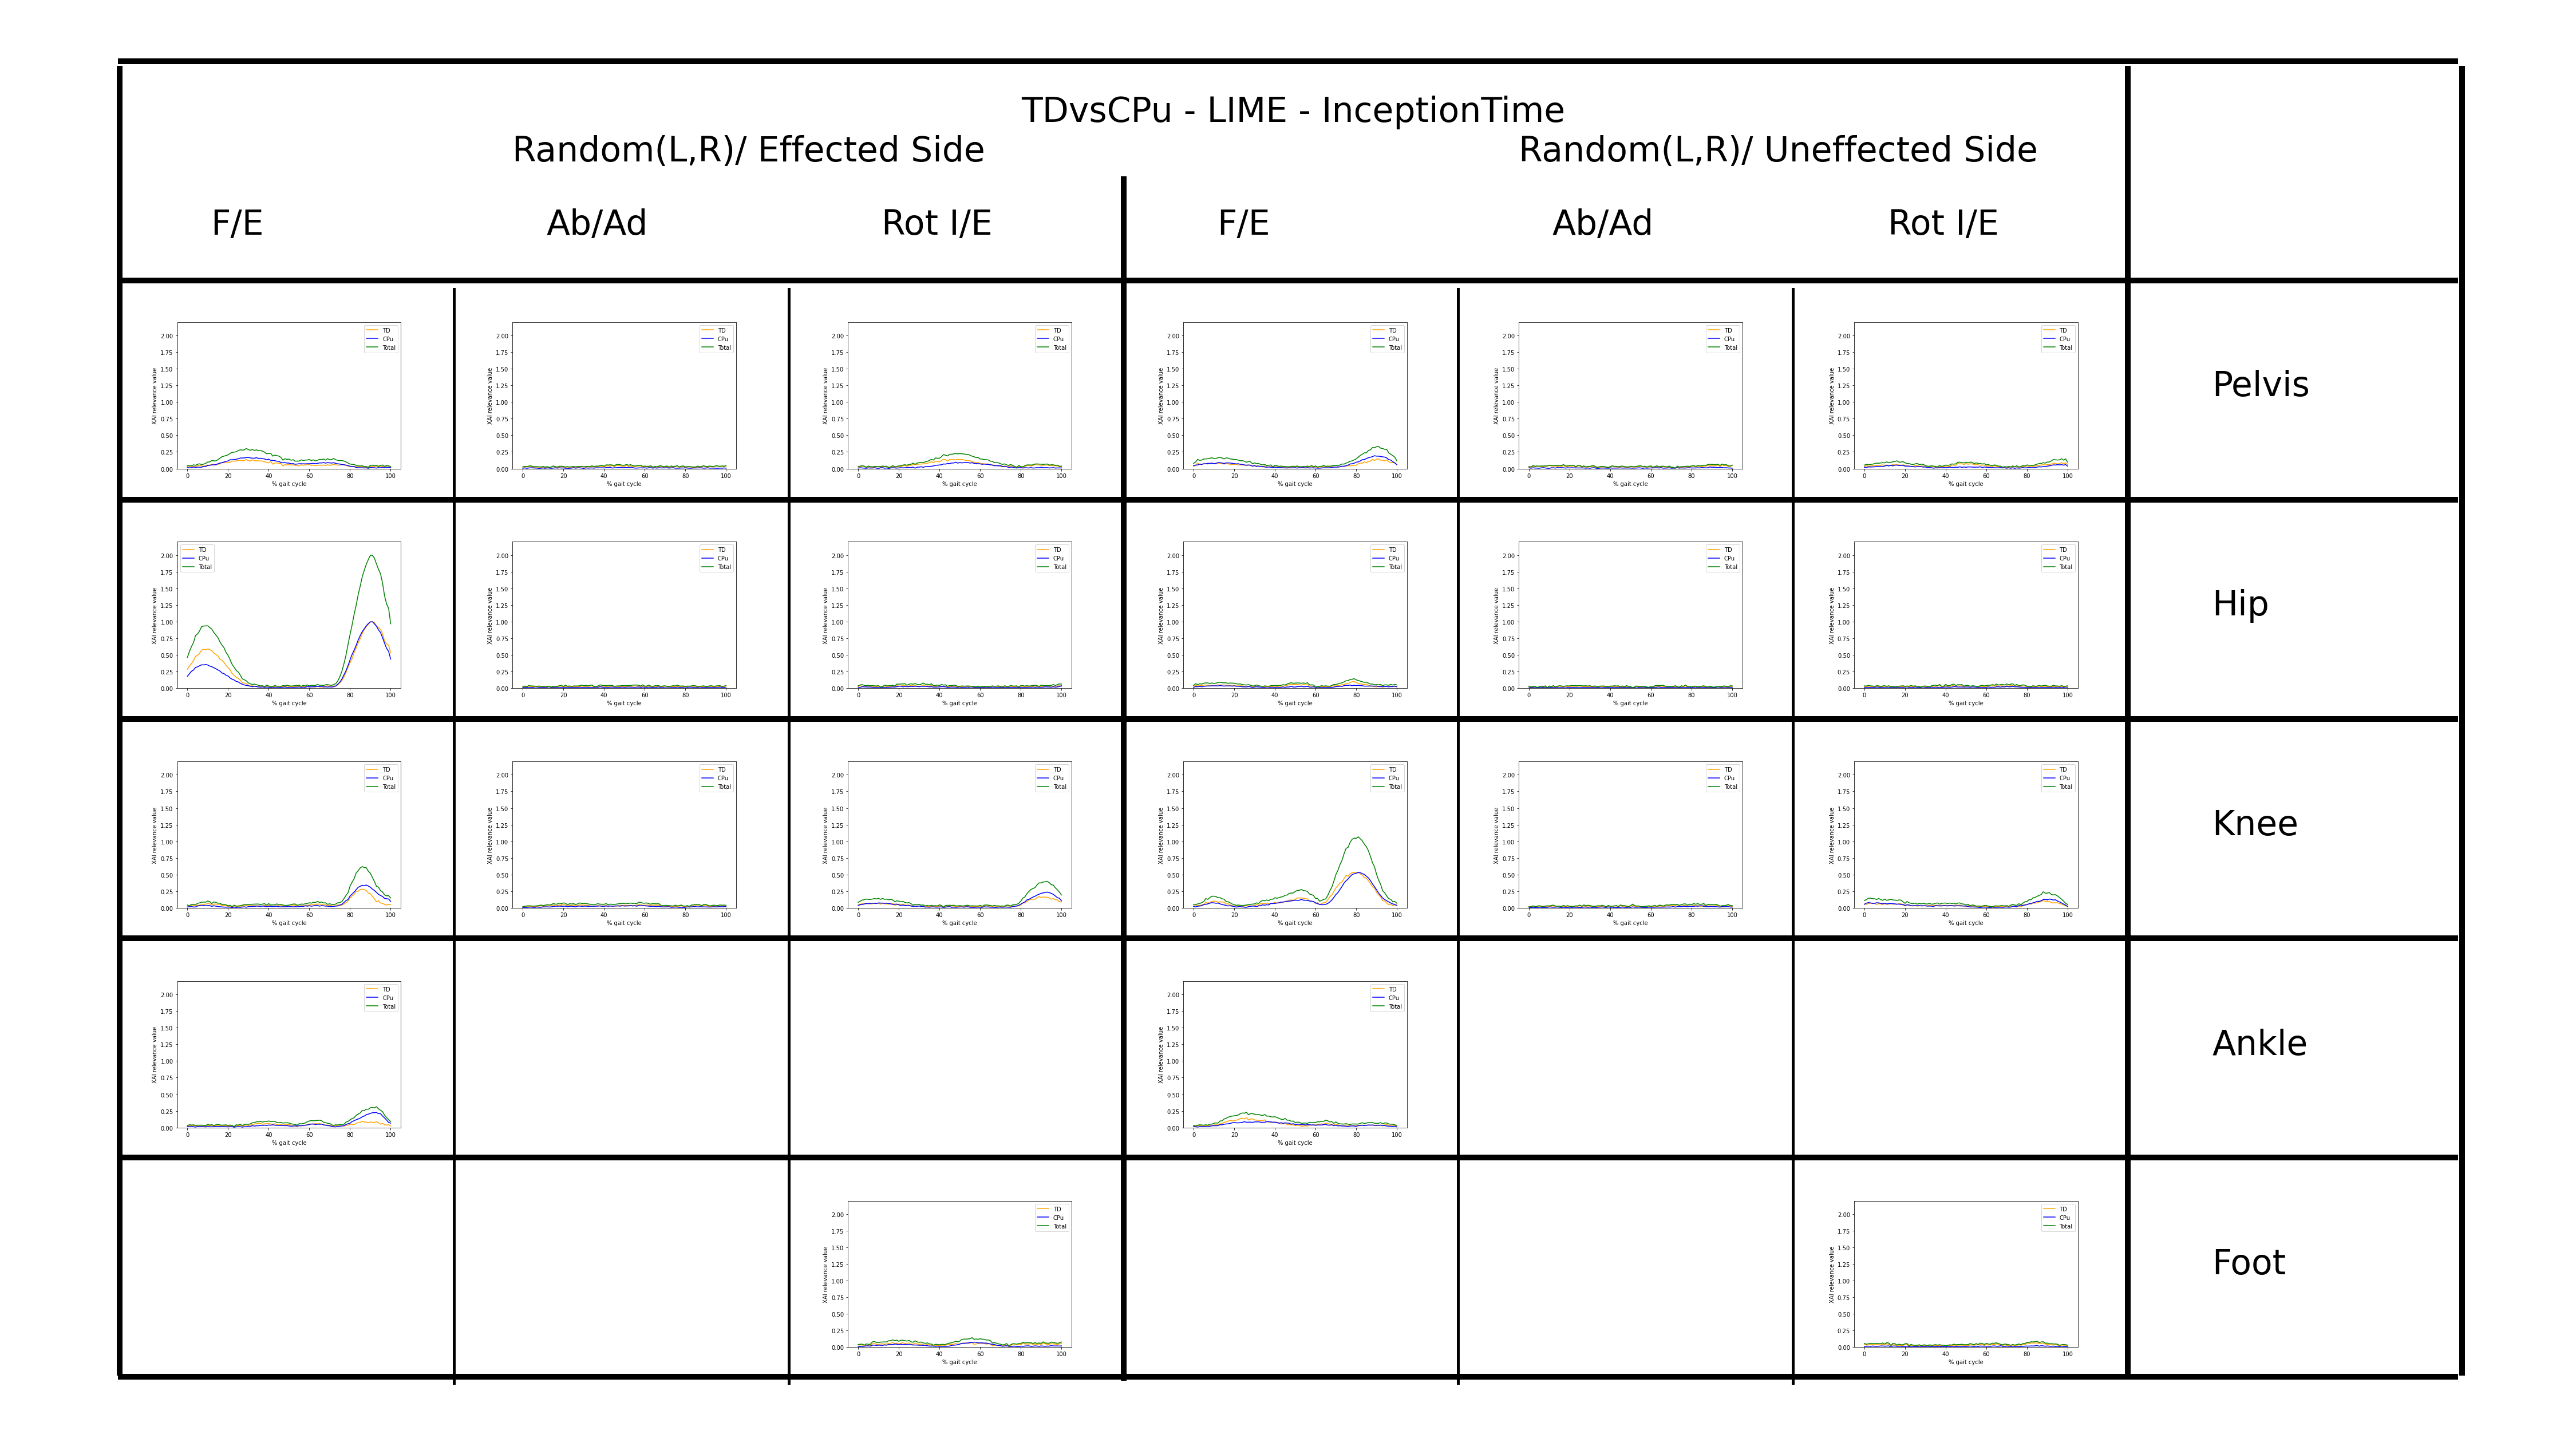

In [6]:
XAI_plot(attrs_0_norm=attrs_0_ResNet_norm,attrs_1_norm=attrs_1_ResNet_norm,RL_list=['Random(L,R)/ Effected Side','Random(L,R)/ Uneffected Side'], D_name ='TDvsCPu',Net_name='ResNet',labels=['TD','CPu'],XAI_method=XAI_method)
XAI_plot(attrs_0_norm=attrs_0_LSTM_norm,attrs_1_norm=attrs_1_LSTM_norm,RL_list=['Random(L,R)/ Effected Side','Random(L,R)/ Uneffected Side'], D_name ='TDvsCPu',Net_name='LSTM',labels=['TD','CPu'],XAI_method=XAI_method)
XAI_plot(attrs_0_norm=attrs_0_InceptionTime_norm,attrs_1_norm=attrs_1_InceptionTime_norm,RL_list=['Random(L,R)/ Effected Side','Random(L,R)/ Uneffected Side'], D_name ='TDvsCPu',Net_name='InceptionTime',labels=['TD','CPu'],XAI_method=XAI_method)

### Pirnt and save the Ranking of relevance value for three nets by angles

In [7]:
print('Ranking of relevance value for three nets',np.array([np.argsort(-attrs_ResNet_norm_angle),np.argsort(-attrs_LSTM_norm_angle) ,np.argsort(-attrs_InceptionTime_norm_angle)]))
os.makedirs('XAI_ranking', exist_ok=True)
np.save('./XAI_ranking/'+str(XAI_method)+'_'+str(D_name)+'_weight', np.array([np.argsort(-attrs_ResNet_norm_angle),np.argsort(-attrs_LSTM_norm_angle) ,np.argsort(-attrs_InceptionTime_norm_angle)]))

Ranking of relevance value for three nets [[ 3  6  0 14 17 19 20 11  9  2  8 10  7 21  5 13 16 15 12  1  4 18]
 [ 3  6  9 11 17 19 14 13 10  5  0 15 16  8  2 21  1  7 12 18 20  4]
 [ 3 17  0  6 11  8 20  9  2 19 10 13 14  7 21  5 16 12  1 18  4 15]]


# DeepSHAP

### Load the result of XAI for DeepSHAP for three nets and do the normalization

In [9]:
attrs_0_ResNet = np.mean(np.abs(np.load("./XAI_value/DeepLiftShap_tdvscp_weight_resnet_0.npy")),axis=0)
attrs_1_ResNet = np.mean(np.abs(np.load("./XAI_value/DeepLiftShap_tdvscp_weight_resnet_1.npy")),axis=0)
attrs_ResNet = attrs_0_ResNet+attrs_1_ResNet

attrs_0_LSTM = np.mean(np.abs(np.load("./XAI_value/DeepLiftShap_tdvscp_weight_LSTM_0.npy")),axis=0)
attrs_1_LSTM = np.mean(np.abs(np.load("./XAI_value/DeepLiftShap_tdvscp_weight_LSTM_1.npy")),axis=0)
attrs_LSTM = attrs_0_LSTM+attrs_1_LSTM

attrs_0_InceptionTime = np.mean(np.abs(np.load("./XAI_value/DeepLiftShap_tdvscp_weight_InceptionTime_0.npy")),axis=0)
attrs_1_InceptionTime = np.mean(np.abs(np.load("./XAI_value/DeepLiftShap_tdvscp_weight_InceptionTime_1.npy")),axis=0)
attrs_InceptionTime = attrs_0_InceptionTime+attrs_1_InceptionTime

attrs_ResNet_norm = normalization(attrs_ResNet)
attrs_0_ResNet_norm = normalization(attrs_0_ResNet)
attrs_1_ResNet_norm = normalization(attrs_1_ResNet)

attrs_LSTM_norm = normalization(attrs_LSTM)
attrs_0_LSTM_norm = normalization(attrs_0_LSTM)
attrs_1_LSTM_norm = normalization(attrs_1_LSTM)

attrs_InceptionTime_norm = normalization(attrs_InceptionTime)
attrs_0_InceptionTime_norm = normalization(attrs_0_InceptionTime)
attrs_1_InceptionTime_norm = normalization(attrs_1_InceptionTime)

attrs_ResNet_norm_angle = normalization(np.mean(attrs_ResNet_norm,axis=1))
attrs_0_ResNet_norm_angle = normalization(np.mean(attrs_0_ResNet_norm,axis=1))
attrs_1_ResNet_norm_angle = normalization(np.mean(attrs_1_ResNet_norm,axis=1))

attrs_LSTM_norm_angle = normalization(np.mean(attrs_LSTM_norm,axis=1))
attrs_0_LSTM_norm_angle = normalization(np.mean(attrs_0_LSTM_norm,axis=1))
attrs_1_LSTM_norm_angle = normalization(np.mean(attrs_1_LSTM_norm,axis=1))

attrs_InceptionTime_norm_angle = normalization(np.mean(attrs_InceptionTime_norm,axis=1))
attrs_0_InceptionTime_norm_angle = normalization(np.mean(attrs_0_InceptionTime_norm,axis=1))
attrs_1_InceptionTime_norm_angle = normalization(np.mean(attrs_1_InceptionTime_norm,axis=1))

XAI_method = 'DeepShap'
labels= ['TD','CPu','Total'] 
Net_name = ['ResNet','LSTM','InceptionTime']
D_name = 'TDvsCPu'
list_rel_nets = [[attrs_0_ResNet_norm_angle,attrs_1_ResNet_norm_angle,np.abs(attrs_0_ResNet_norm_angle)+np.abs(attrs_1_ResNet_norm_angle)], [attrs_0_LSTM_norm_angle,attrs_1_LSTM_norm_angle,np.abs(attrs_0_LSTM_norm_angle)+np.abs(attrs_1_LSTM_norm_angle)], [attrs_0_InceptionTime_norm_angle,attrs_1_InceptionTime_norm_angle,np.abs(attrs_0_InceptionTime_norm_angle)+np.abs(attrs_1_InceptionTime_norm_angle)]]


### Average the normalized XAI results by angles and plot & save

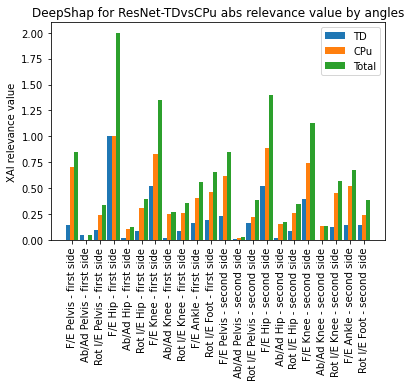

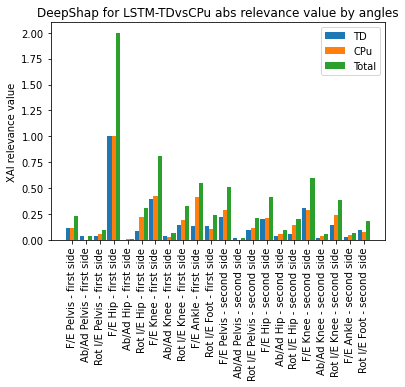

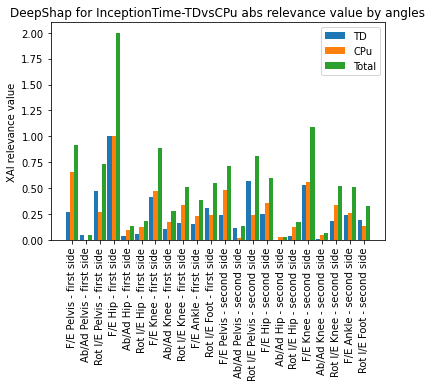

In [10]:
for idx_Net, Net in enumerate(Net_name):
    list_rel = list_rel_nets[idx_Net]
    width = 0.3
    multiplier = -0.3

    for idx, i in enumerate(list_rel):

        plt.bar(np.arange(22)+np.ones(22)*multiplier , np.abs(i), width,label=labels[idx])
        multiplier += 0.3

    plt.xticks(range(22),ranking,rotation=90)
    plt.ylabel('XAI relevance value')
    plt.legend()
    plt.title(str(XAI_method)+' for '+str(Net)+'-'+str(D_name)+' abs relevance value by angles')

    path_img = './XAI_plot/'
    save=str(XAI_method)+'_'+str(Net)+'_'+str(D_name)+'_angles'
    plt.savefig(path_img+save,bbox_inches = 'tight',facecolor ="w",dpi=1000)
    plt.show()

### Average the normalized XAI results by angles and plot & save

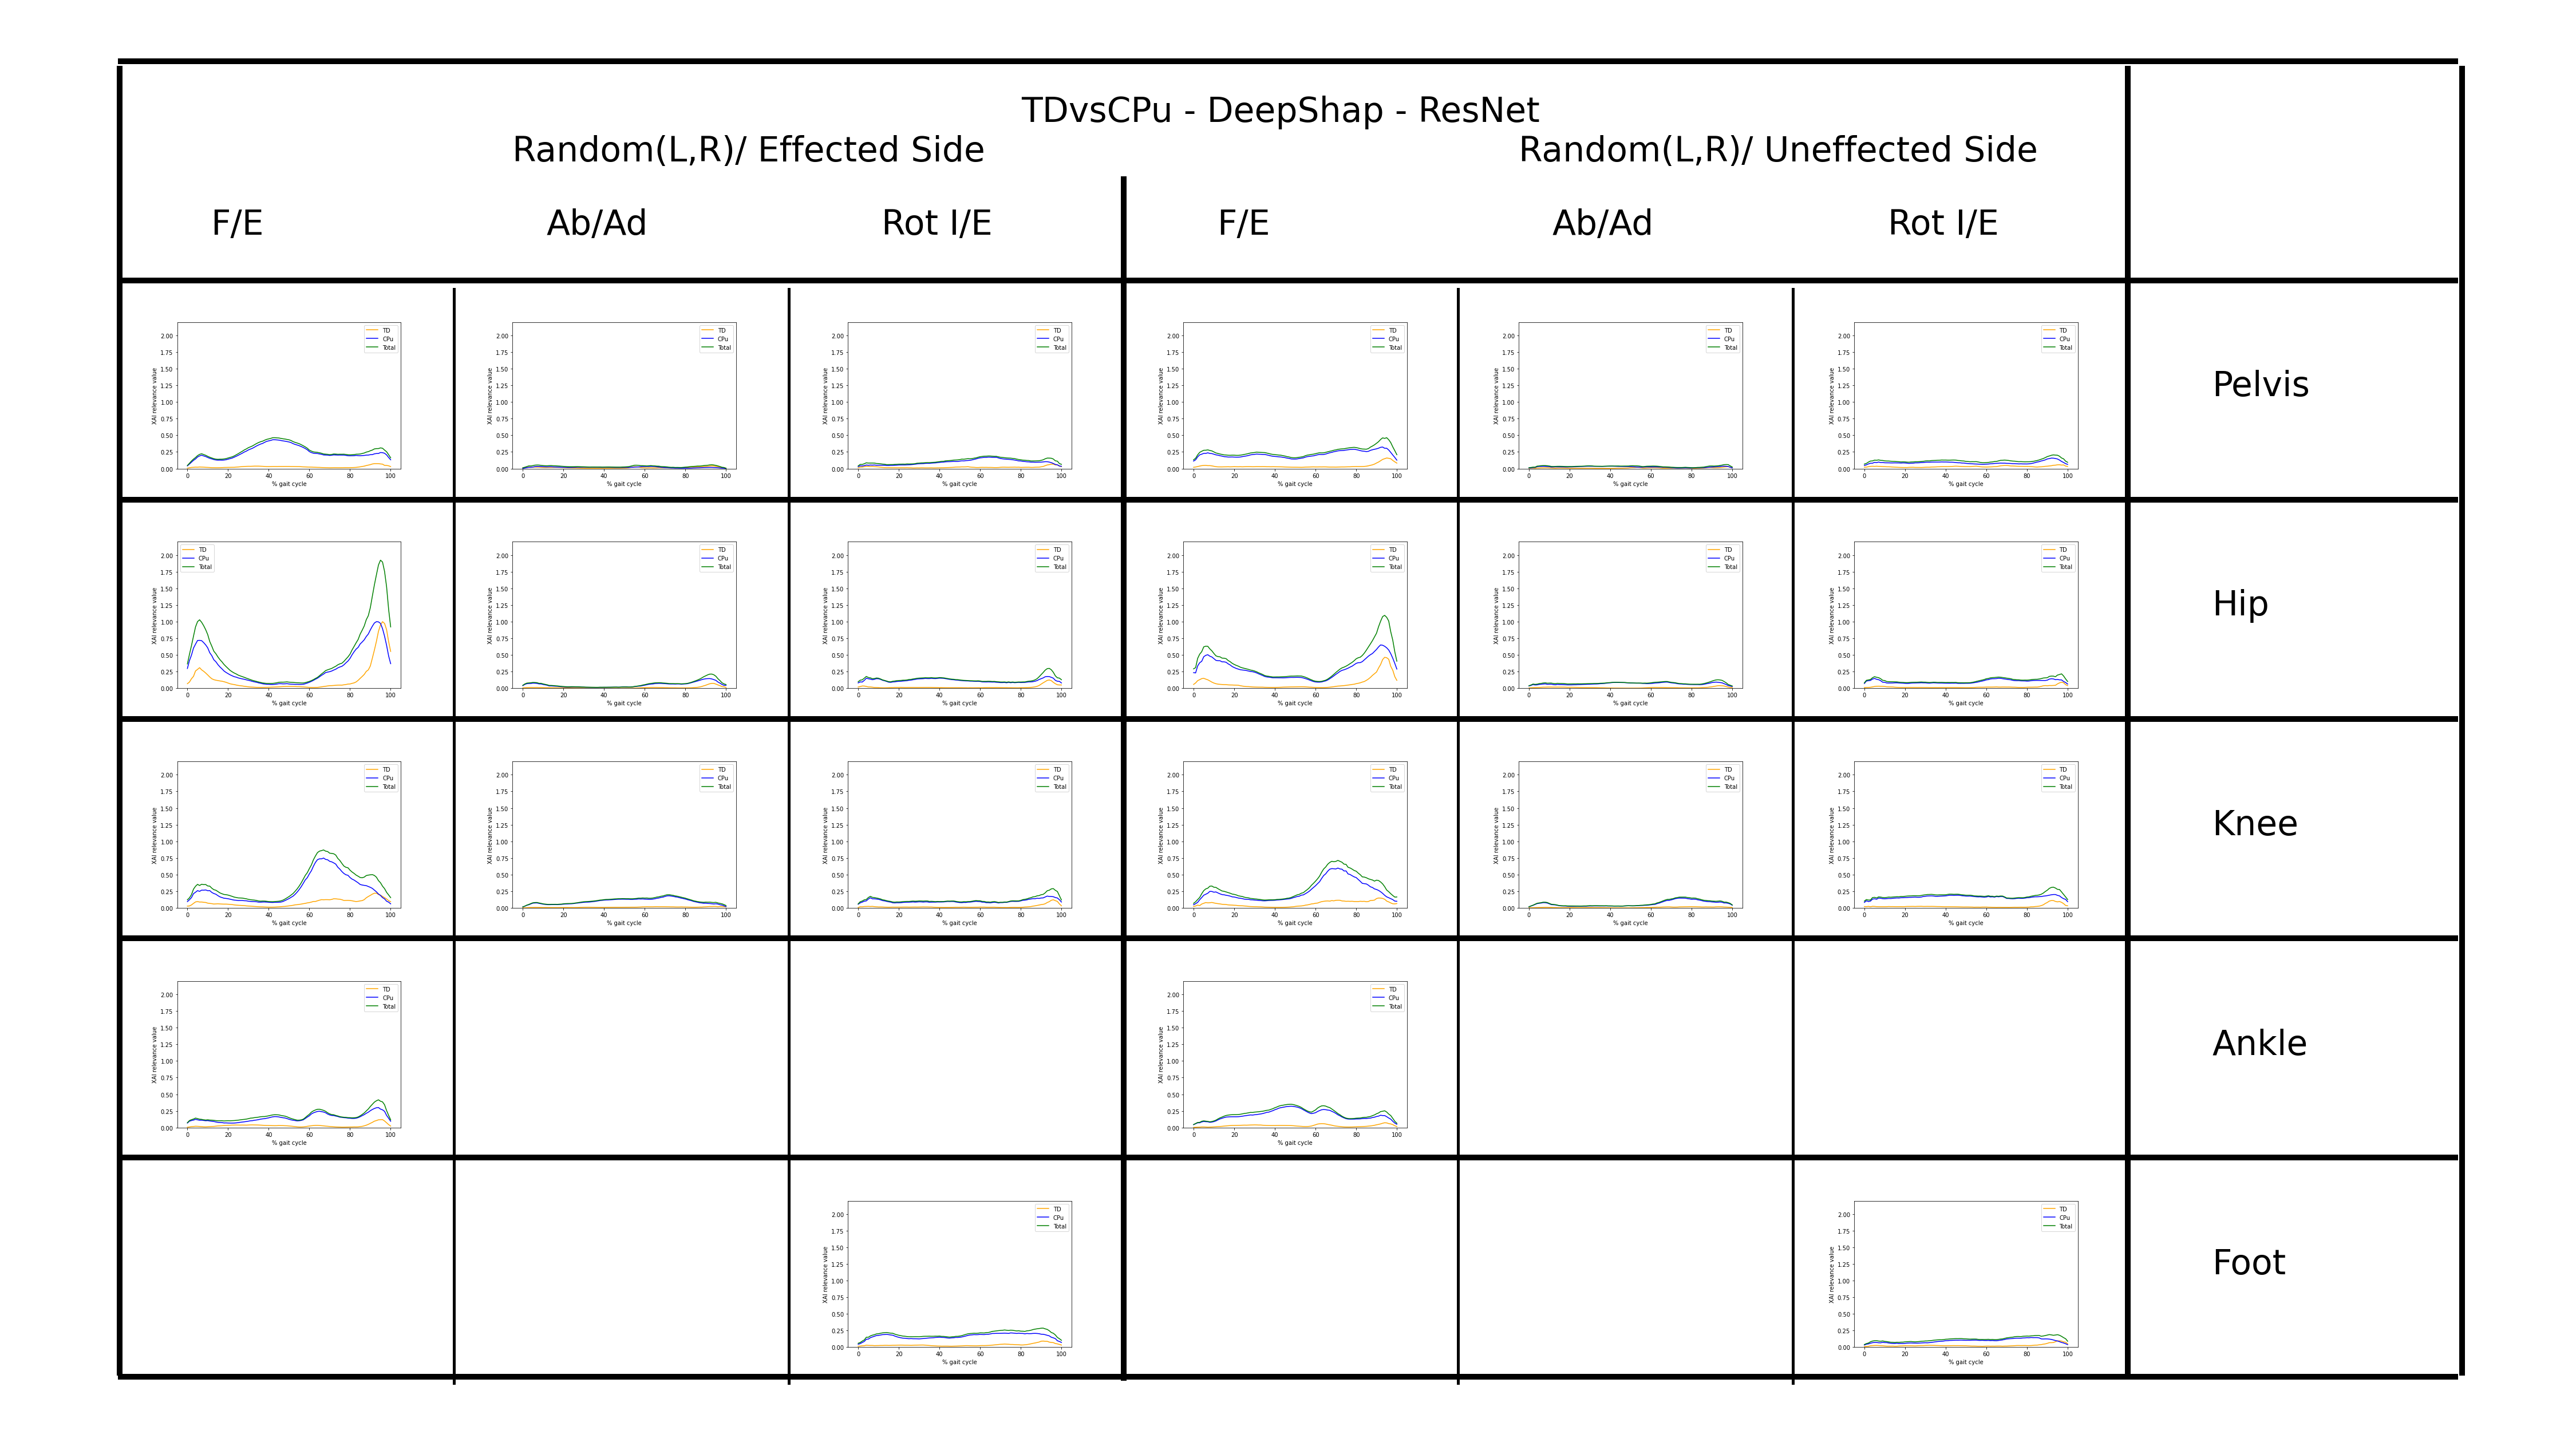

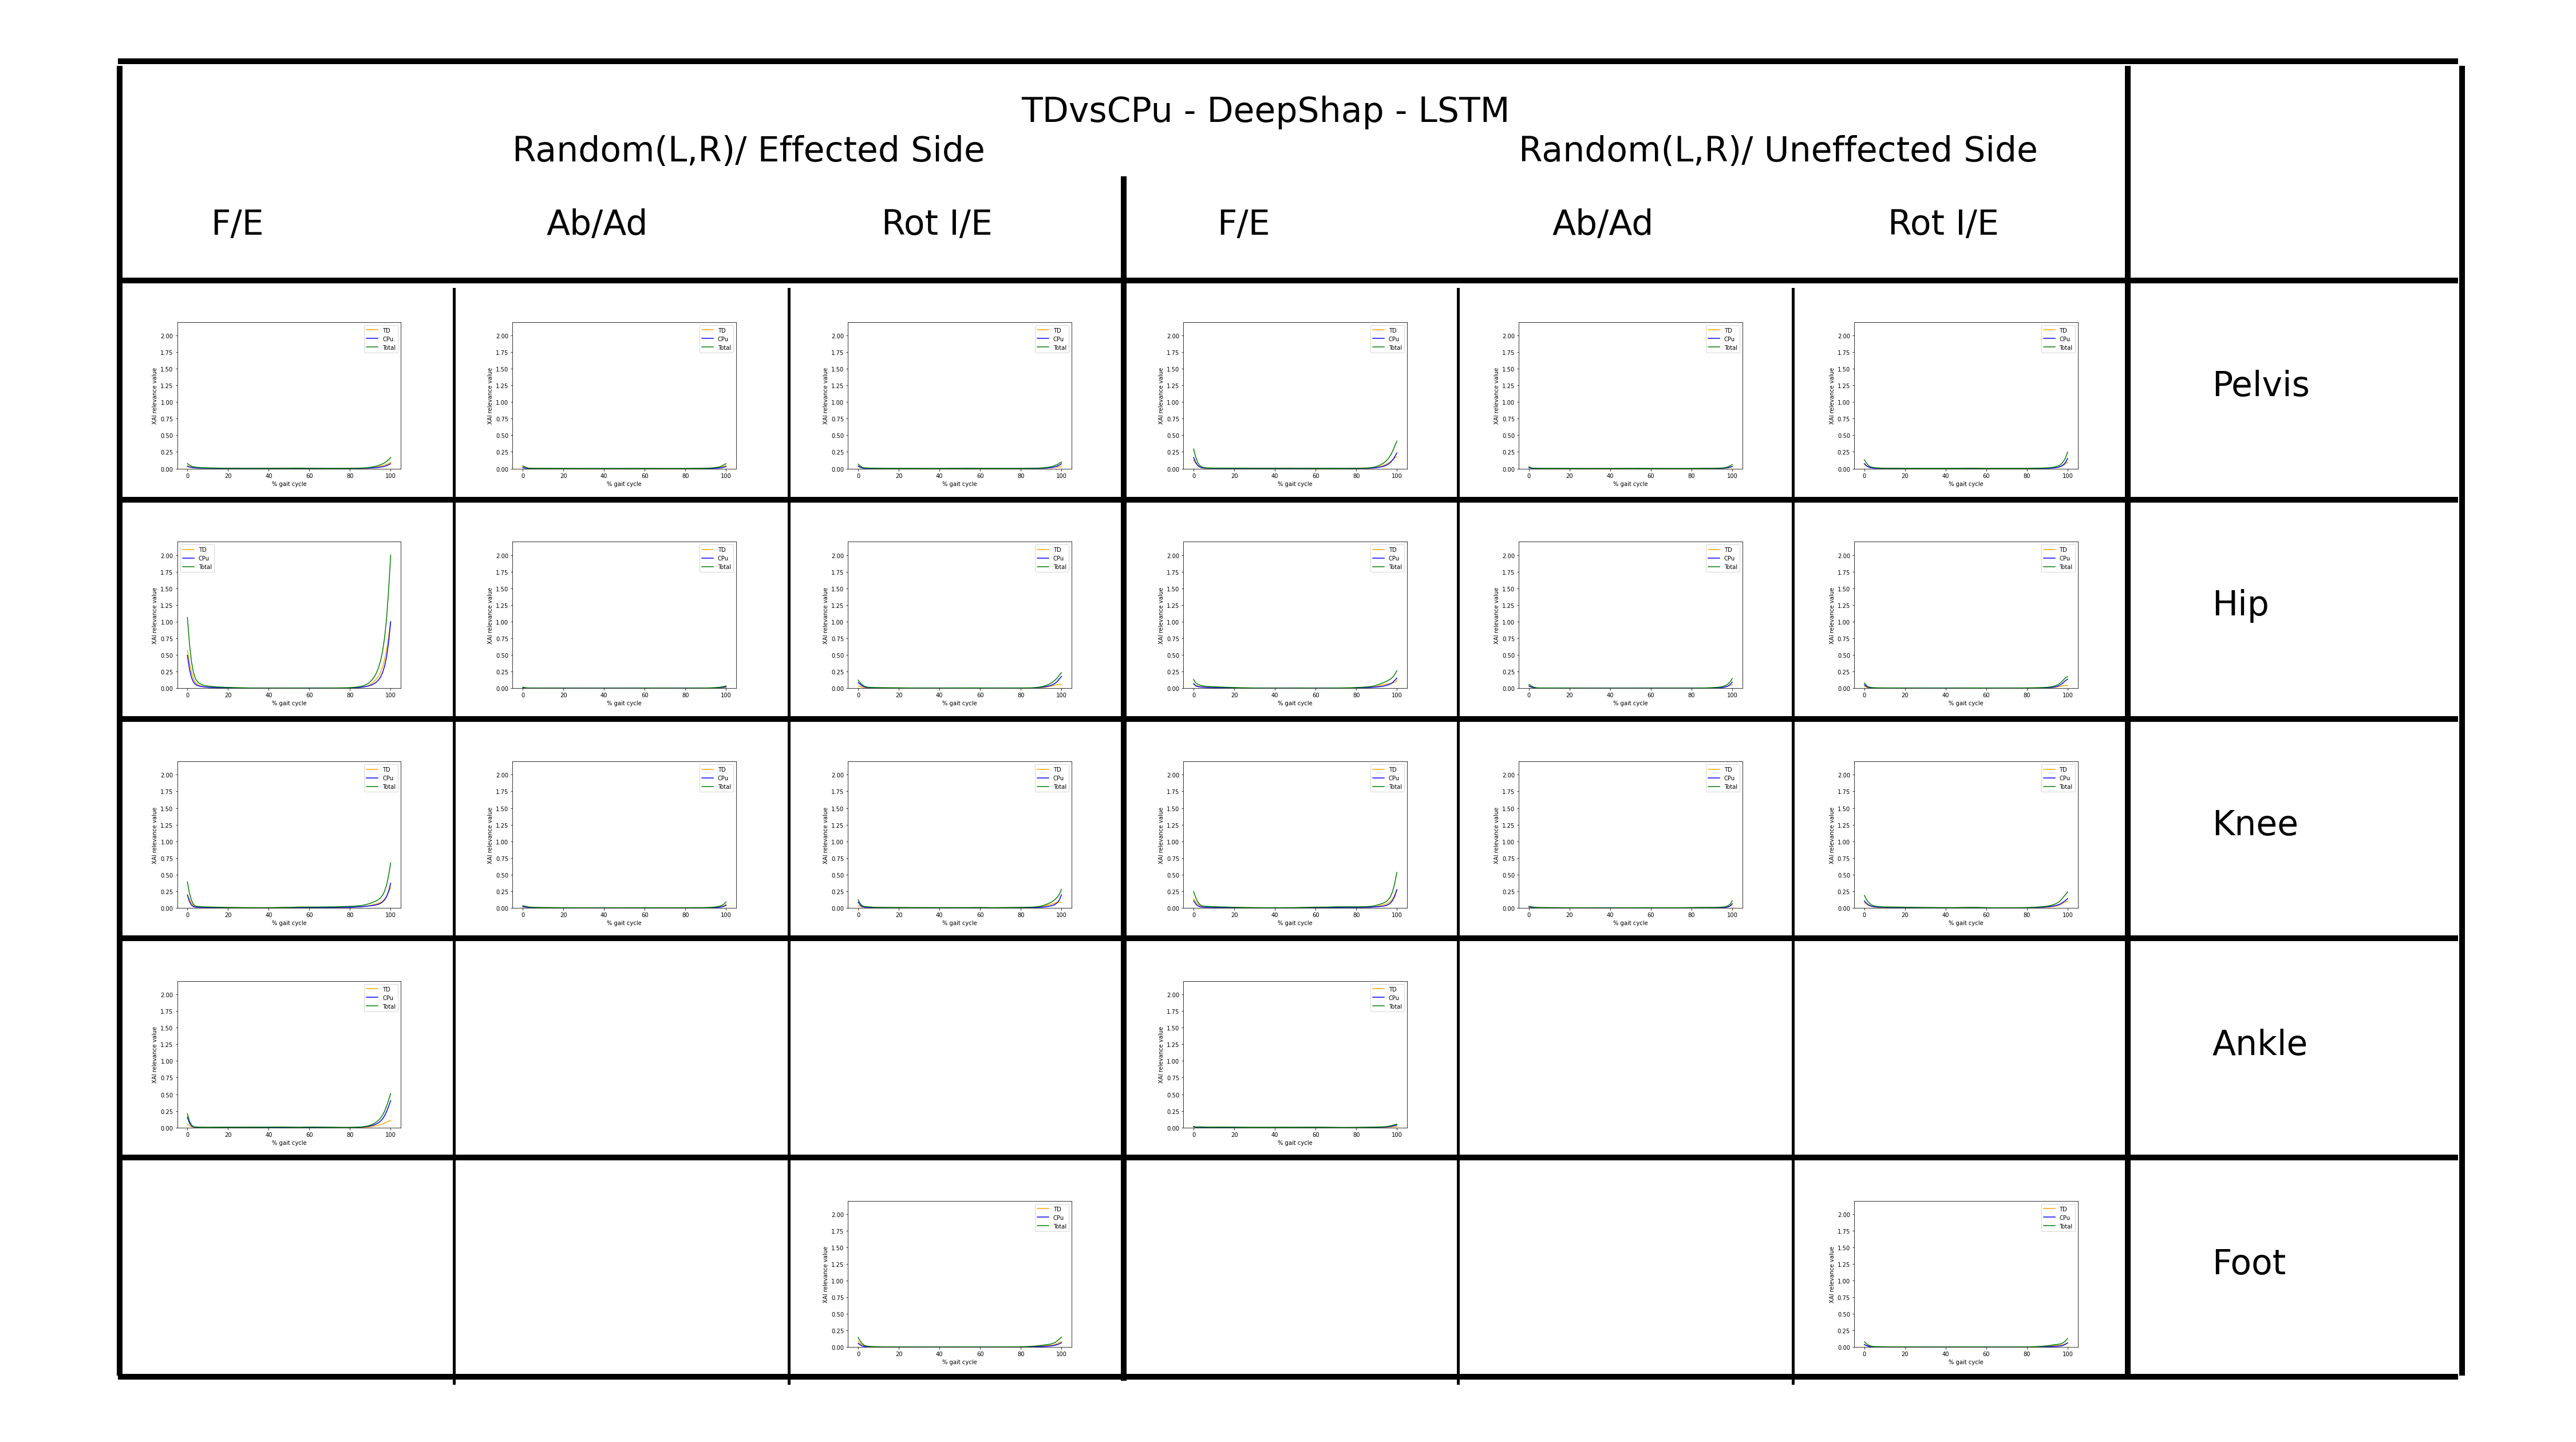

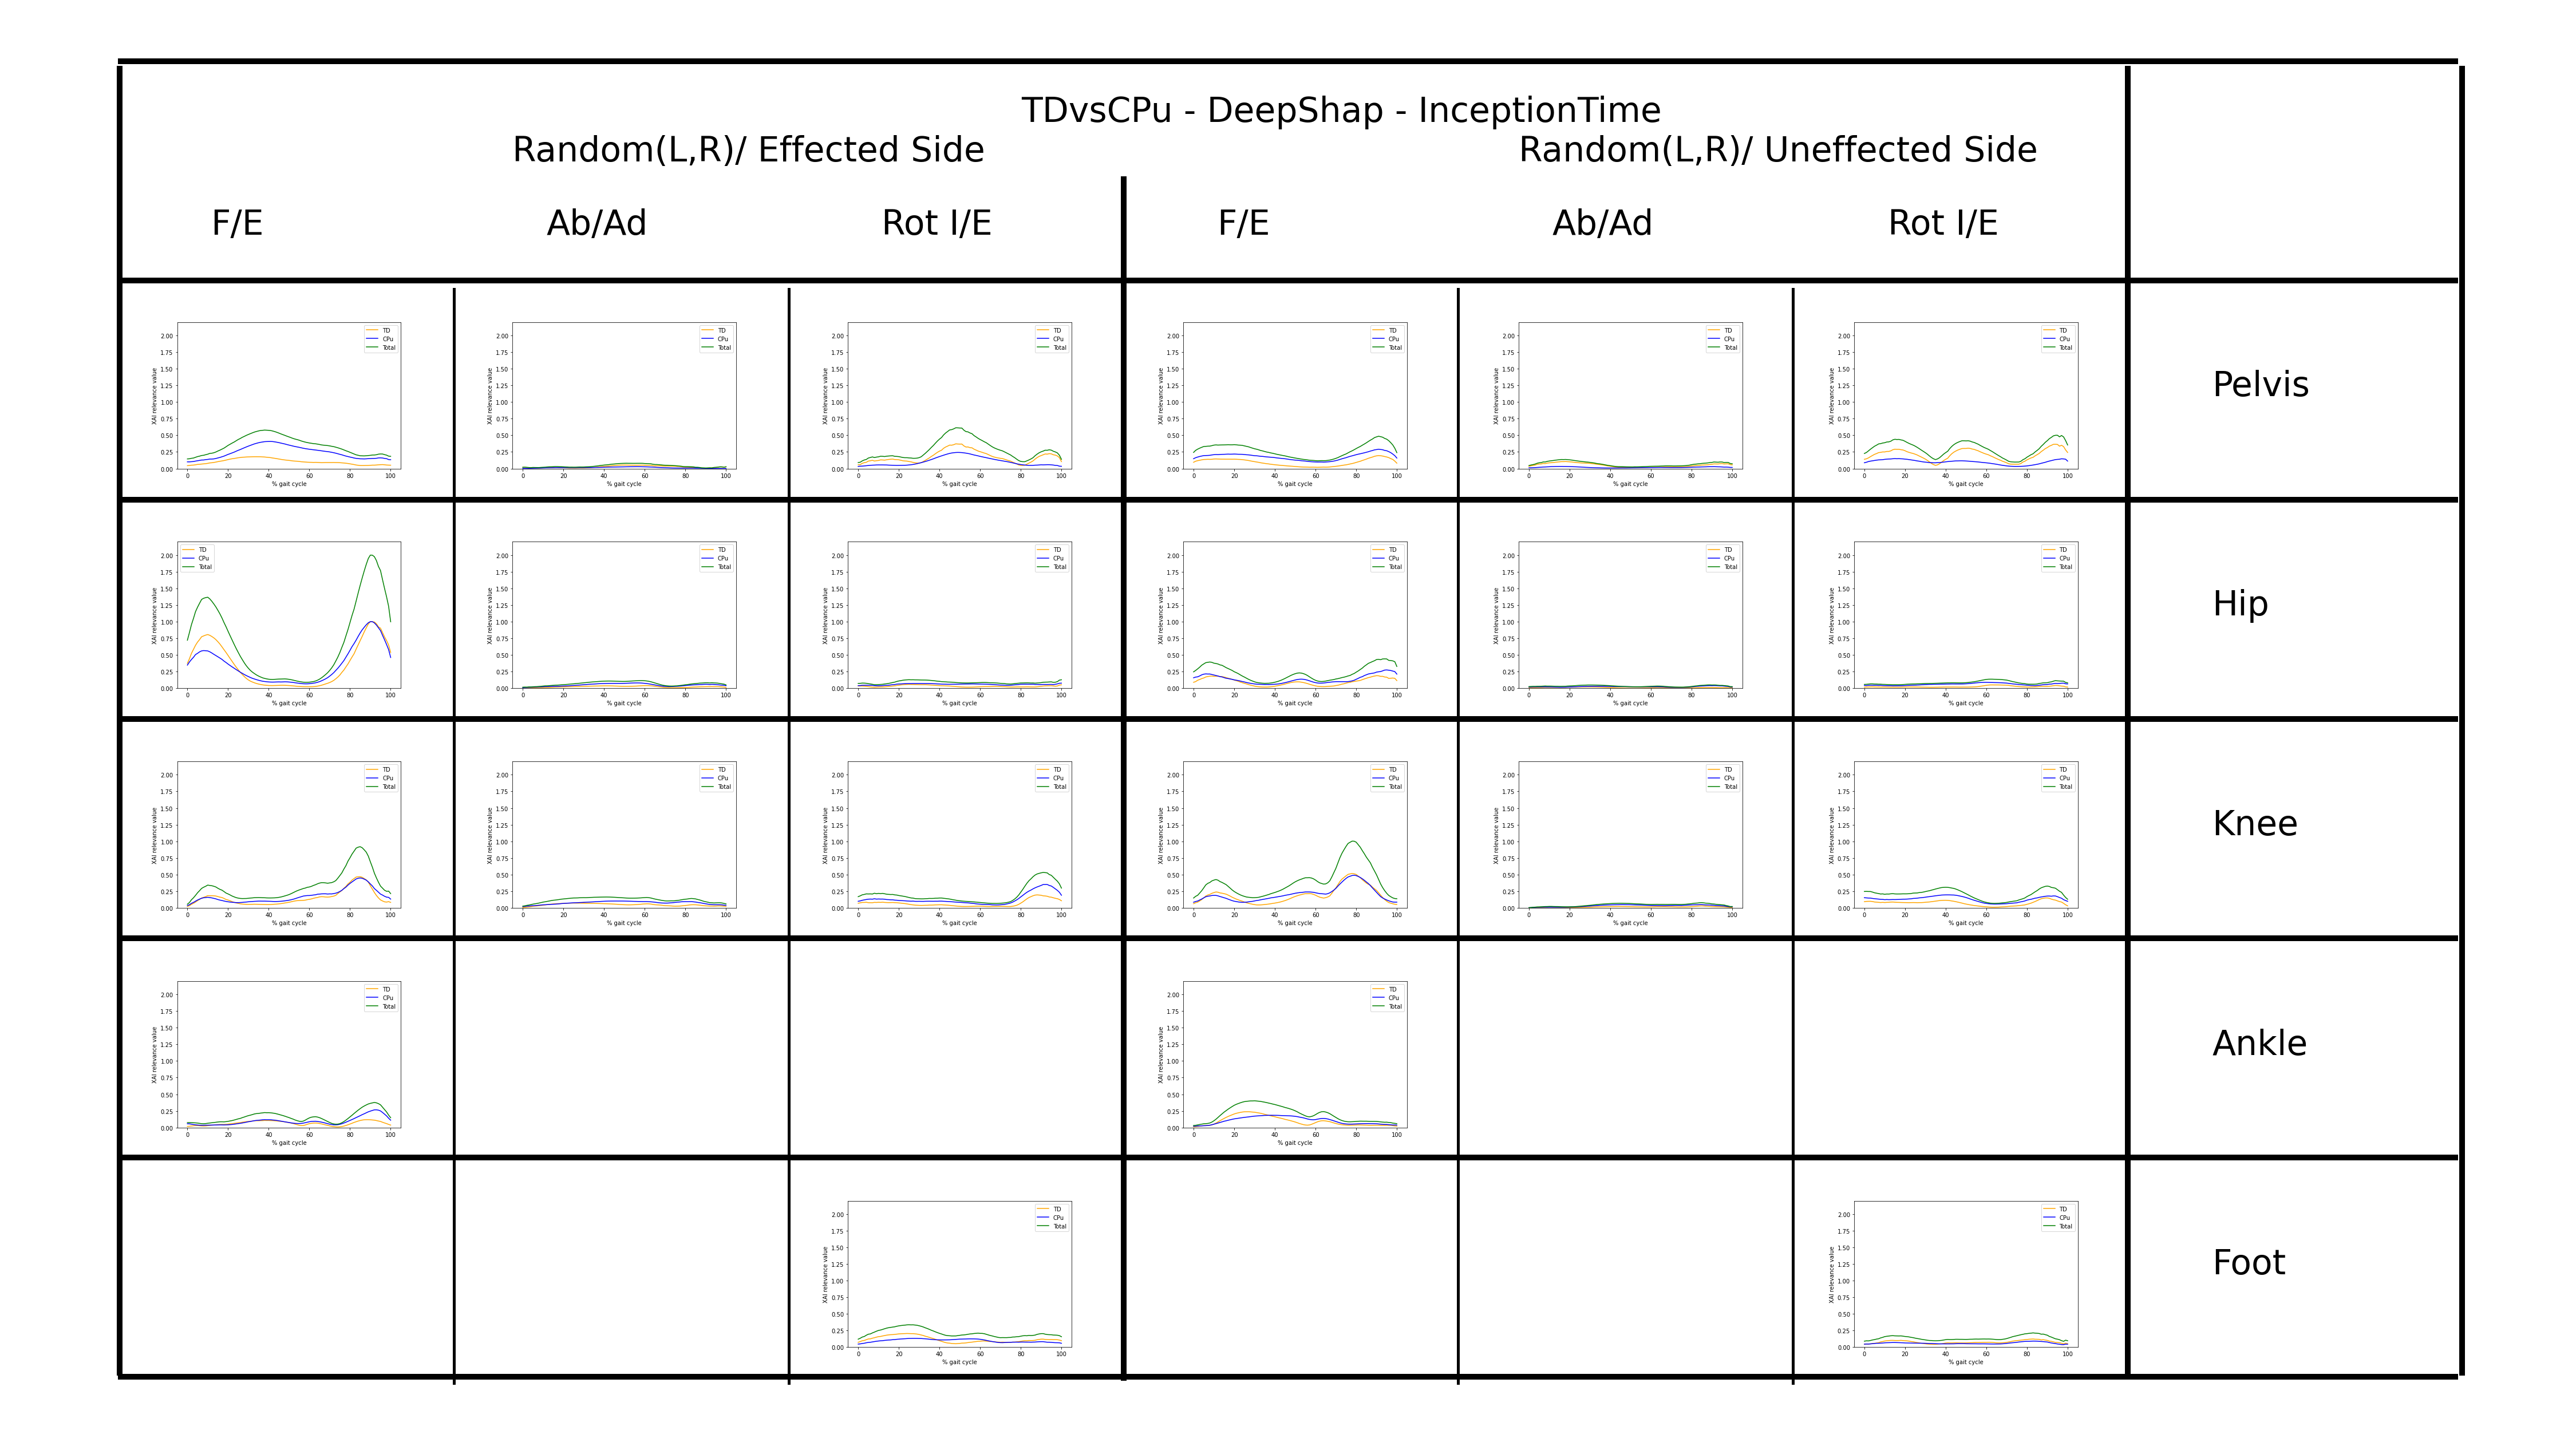

In [11]:
XAI_plot(attrs_0_norm=attrs_0_ResNet_norm,attrs_1_norm=attrs_1_ResNet_norm,RL_list=['Random(L,R)/ Effected Side','Random(L,R)/ Uneffected Side'], D_name ='TDvsCPu',Net_name='ResNet',labels=['TD','CPu'],XAI_method=XAI_method)
XAI_plot(attrs_0_norm=attrs_0_LSTM_norm,attrs_1_norm=attrs_1_LSTM_norm,RL_list=['Random(L,R)/ Effected Side','Random(L,R)/ Uneffected Side'], D_name ='TDvsCPu',Net_name='LSTM',labels=['TD','CPu'],XAI_method=XAI_method)
XAI_plot(attrs_0_norm=attrs_0_InceptionTime_norm,attrs_1_norm=attrs_1_InceptionTime_norm,RL_list=['Random(L,R)/ Effected Side','Random(L,R)/ Uneffected Side'], D_name ='TDvsCPu',Net_name='InceptionTime',labels=['TD','CPu'],XAI_method=XAI_method)

### Pirnt and save the Ranking of relevance value for three nets by angles

In [12]:
print('Ranking of relevance value for three nets',np.array([np.argsort(-attrs_ResNet_norm_angle),np.argsort(-attrs_LSTM_norm_angle) ,np.argsort(-attrs_InceptionTime_norm_angle)]))
os.makedirs('XAI_ranking', exist_ok=True)
np.save('./XAI_ranking/'+str(XAI_method)+'_'+str(D_name)+'_weight', np.array([np.argsort(-attrs_ResNet_norm_angle),np.argsort(-attrs_LSTM_norm_angle) ,np.argsort(-attrs_InceptionTime_norm_angle)]))

Ranking of relevance value for three nets [[ 3 14  6 17 11 10  0 20  9 13 19 21  2  5  8 16  7  1 15  4 18 12]
 [ 3  6 17 11  9 14 19  8 10  5  0 13 21 16  2 15  7 20  1 18 12  4]
 [ 3 17 13  6  2  0 11 10 14 20 19  8 21  9  7 12  5 16  4  1 18 15]]


# Integrated Gradients

### Load the result of XAI for integrated gradients for three nets and do the normalization

In [13]:
attrs_0_ResNet = np.mean(np.abs(np.load("./XAI_value/ig_tdvscp_weight_ResNet_0.npy")),axis=0)
attrs_1_ResNet = np.mean(np.abs(np.load("./XAI_value/ig_tdvscp_weight_ResNet_1.npy")),axis=0)
attrs_ResNet = attrs_0_ResNet+attrs_1_ResNet

attrs_0_LSTM = np.mean(np.abs(np.load("./XAI_value/ig_tdvscp_weight_LSTM_0.npy")),axis=0)
attrs_1_LSTM = np.mean(np.abs(np.load("./XAI_value/ig_tdvscp_weight_LSTM_1.npy")),axis=0)
attrs_LSTM = attrs_0_LSTM+attrs_1_LSTM

attrs_0_InceptionTime = np.mean(np.abs(np.load("./XAI_value/ig_tdvscp_weight_InceptionTime_0.npy")),axis=0)
attrs_1_InceptionTime = np.mean(np.abs(np.load("./XAI_value/ig_tdvscp_weight_InceptionTime_1.npy")),axis=0)
attrs_InceptionTime = attrs_0_InceptionTime+attrs_1_InceptionTime

attrs_ResNet_norm = normalization(attrs_ResNet)
attrs_0_ResNet_norm = normalization(attrs_0_ResNet)
attrs_1_ResNet_norm = normalization(attrs_1_ResNet)

attrs_LSTM_norm = normalization(attrs_LSTM)
attrs_0_LSTM_norm = normalization(attrs_0_LSTM)
attrs_1_LSTM_norm = normalization(attrs_1_LSTM)

attrs_InceptionTime_norm = normalization(attrs_InceptionTime)
attrs_0_InceptionTime_norm = normalization(attrs_0_InceptionTime)
attrs_1_InceptionTime_norm = normalization(attrs_1_InceptionTime)

attrs_ResNet_norm_angle = normalization(np.mean(attrs_ResNet_norm,axis=1))
attrs_0_ResNet_norm_angle = normalization(np.mean(attrs_0_ResNet_norm,axis=1))
attrs_1_ResNet_norm_angle = normalization(np.mean(attrs_1_ResNet_norm,axis=1))

attrs_LSTM_norm_angle = normalization(np.mean(attrs_LSTM_norm,axis=1))
attrs_0_LSTM_norm_angle = normalization(np.mean(attrs_0_LSTM_norm,axis=1))
attrs_1_LSTM_norm_angle = normalization(np.mean(attrs_1_LSTM_norm,axis=1))

attrs_InceptionTime_norm_angle = normalization(np.mean(attrs_InceptionTime_norm,axis=1))
attrs_0_InceptionTime_norm_angle = normalization(np.mean(attrs_0_InceptionTime_norm,axis=1))
attrs_1_InceptionTime_norm_angle = normalization(np.mean(attrs_1_InceptionTime_norm,axis=1))

XAI_method = 'IG'
labels= ['TD','CPu','Total'] 
Net_name = ['ResNet','LSTM','InceptionTime']
D_name = 'TDvsCPu'
list_rel_nets = [[attrs_0_ResNet_norm_angle,attrs_1_ResNet_norm_angle,np.abs(attrs_0_ResNet_norm_angle)+np.abs(attrs_1_ResNet_norm_angle)], [attrs_0_LSTM_norm_angle,attrs_1_LSTM_norm_angle,np.abs(attrs_0_LSTM_norm_angle)+np.abs(attrs_1_LSTM_norm_angle)], [attrs_0_InceptionTime_norm_angle,attrs_1_InceptionTime_norm_angle,np.abs(attrs_0_InceptionTime_norm_angle)+np.abs(attrs_1_InceptionTime_norm_angle)]]


### Average the normalized XAI results by angles and plot & save

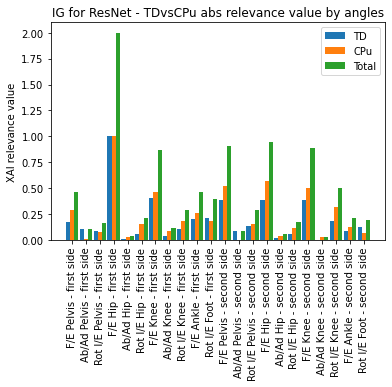

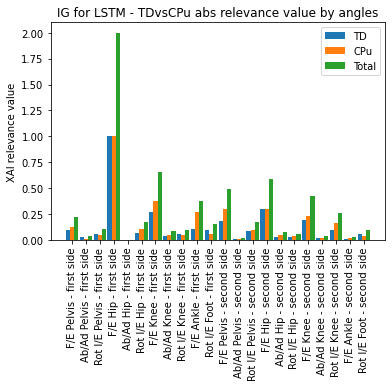

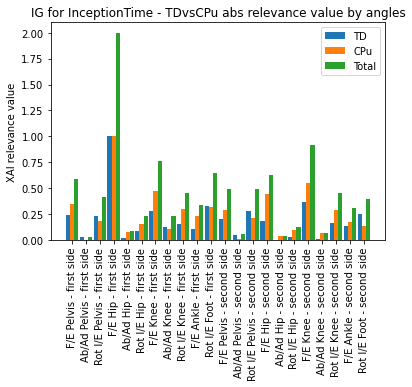

In [14]:
for idx_Net, Net in enumerate(Net_name):
    list_rel = list_rel_nets[idx_Net]
    width = 0.3
    multiplier = -0.3

    for idx, i in enumerate(list_rel):

        plt.bar(np.arange(22)+np.ones(22)*multiplier , np.abs(i), width,label=labels[idx])
        multiplier += 0.3

    plt.xticks(range(22),ranking,rotation=90)
    plt.ylabel('XAI relevance value')
    plt.legend()
    plt.title(str(XAI_method)+' for '+str(Net)+' - '+str(D_name)+' abs relevance value by angles')

    path_img = './XAI_plot/'
    save=str(XAI_method)+'_'+str(Net)+'_'+str(D_name)+'_angles'
    plt.savefig(path_img+save,bbox_inches = 'tight',facecolor ="w",dpi=1000)
    plt.show()

### Average the normalized XAI results by angles and plot & save

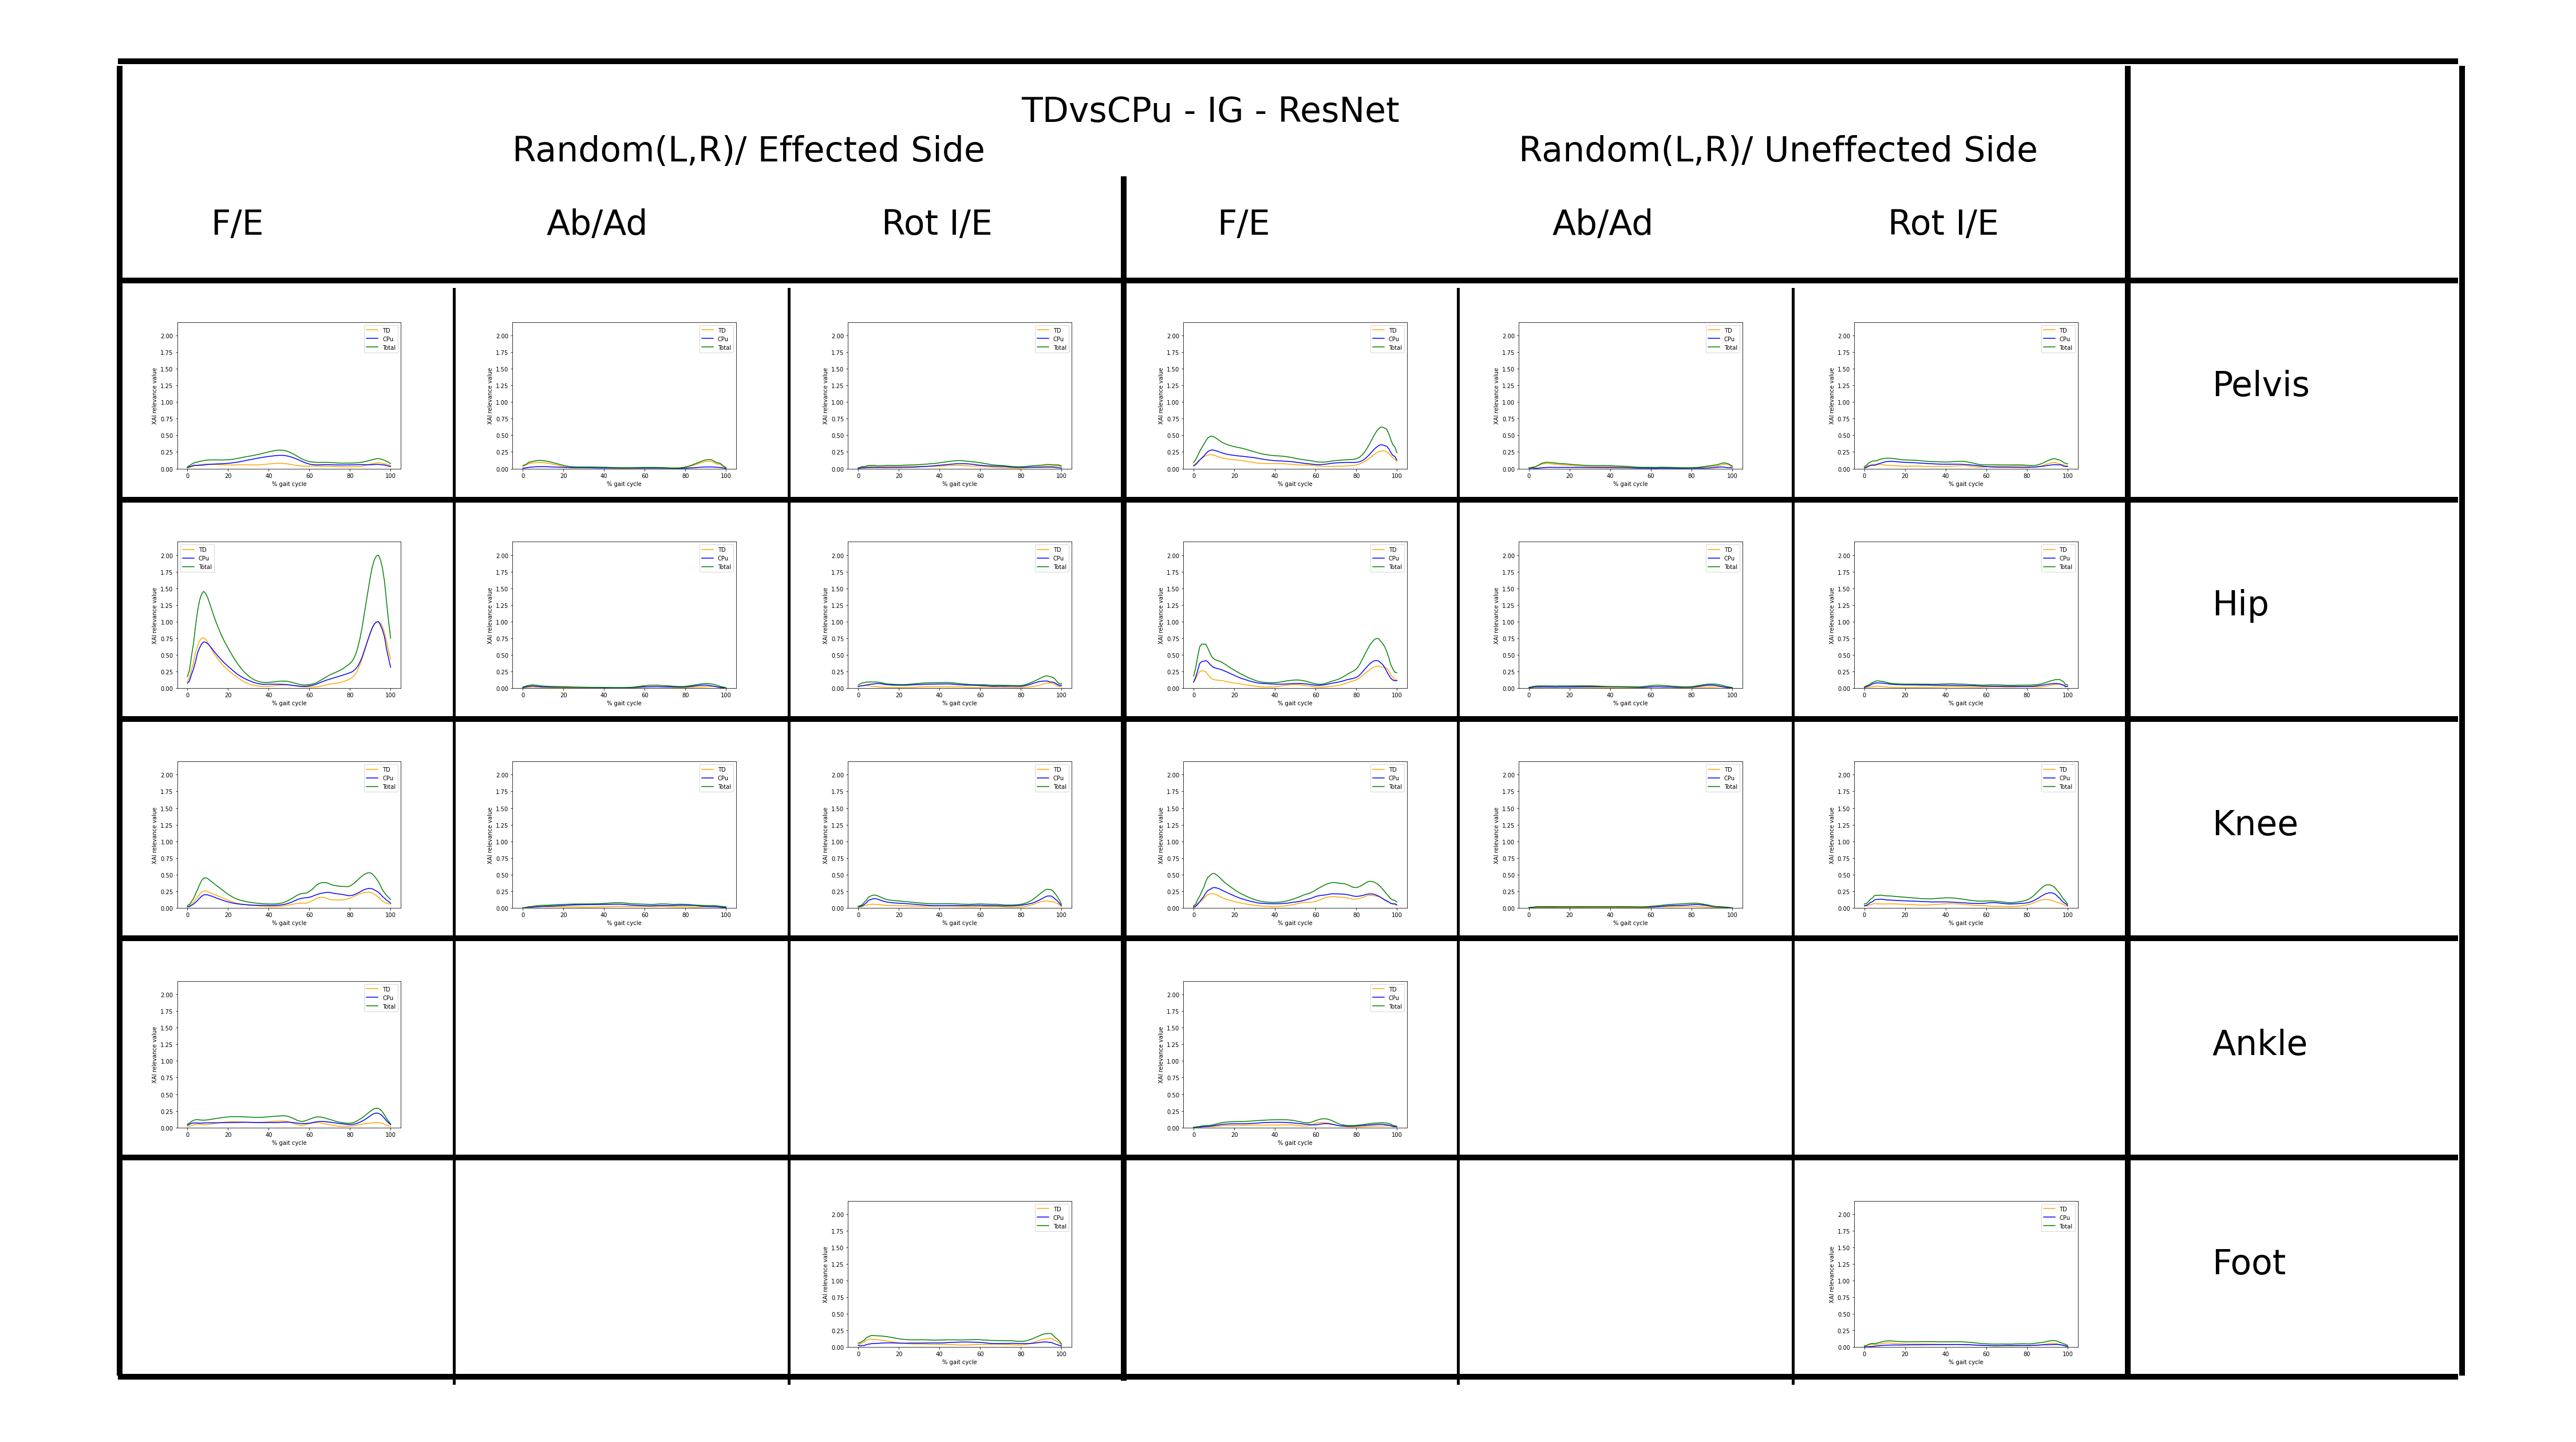

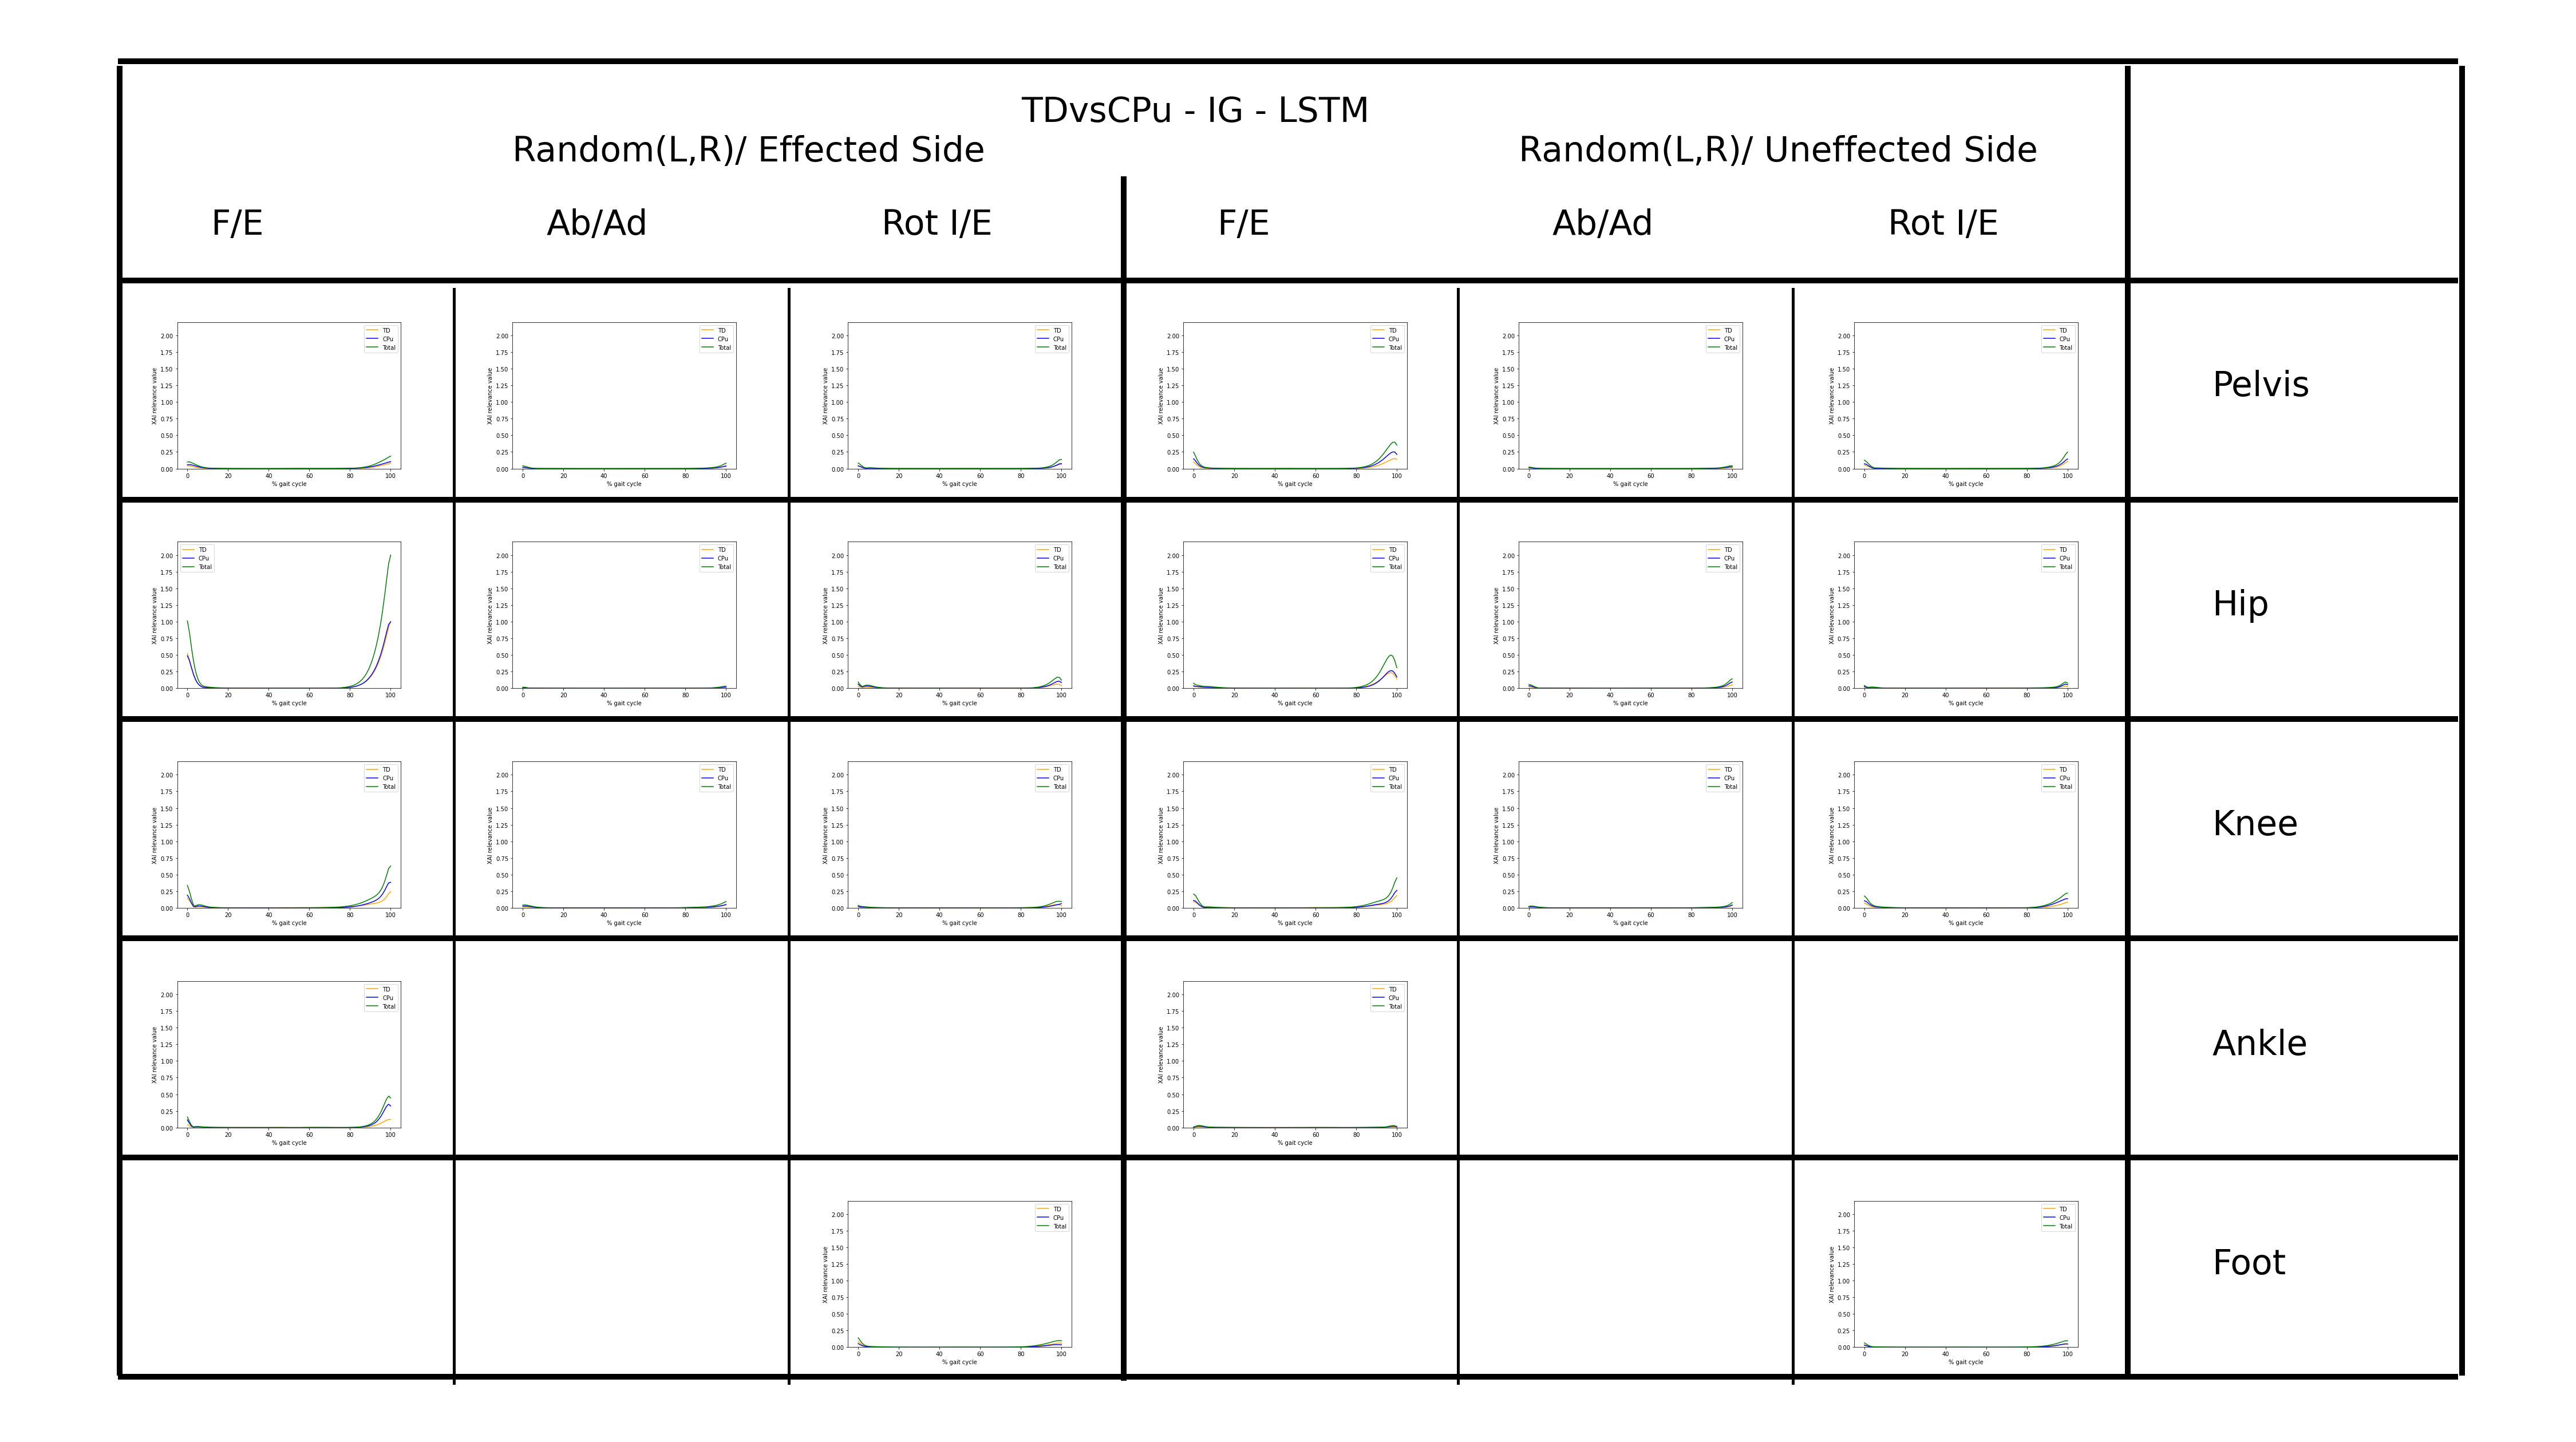

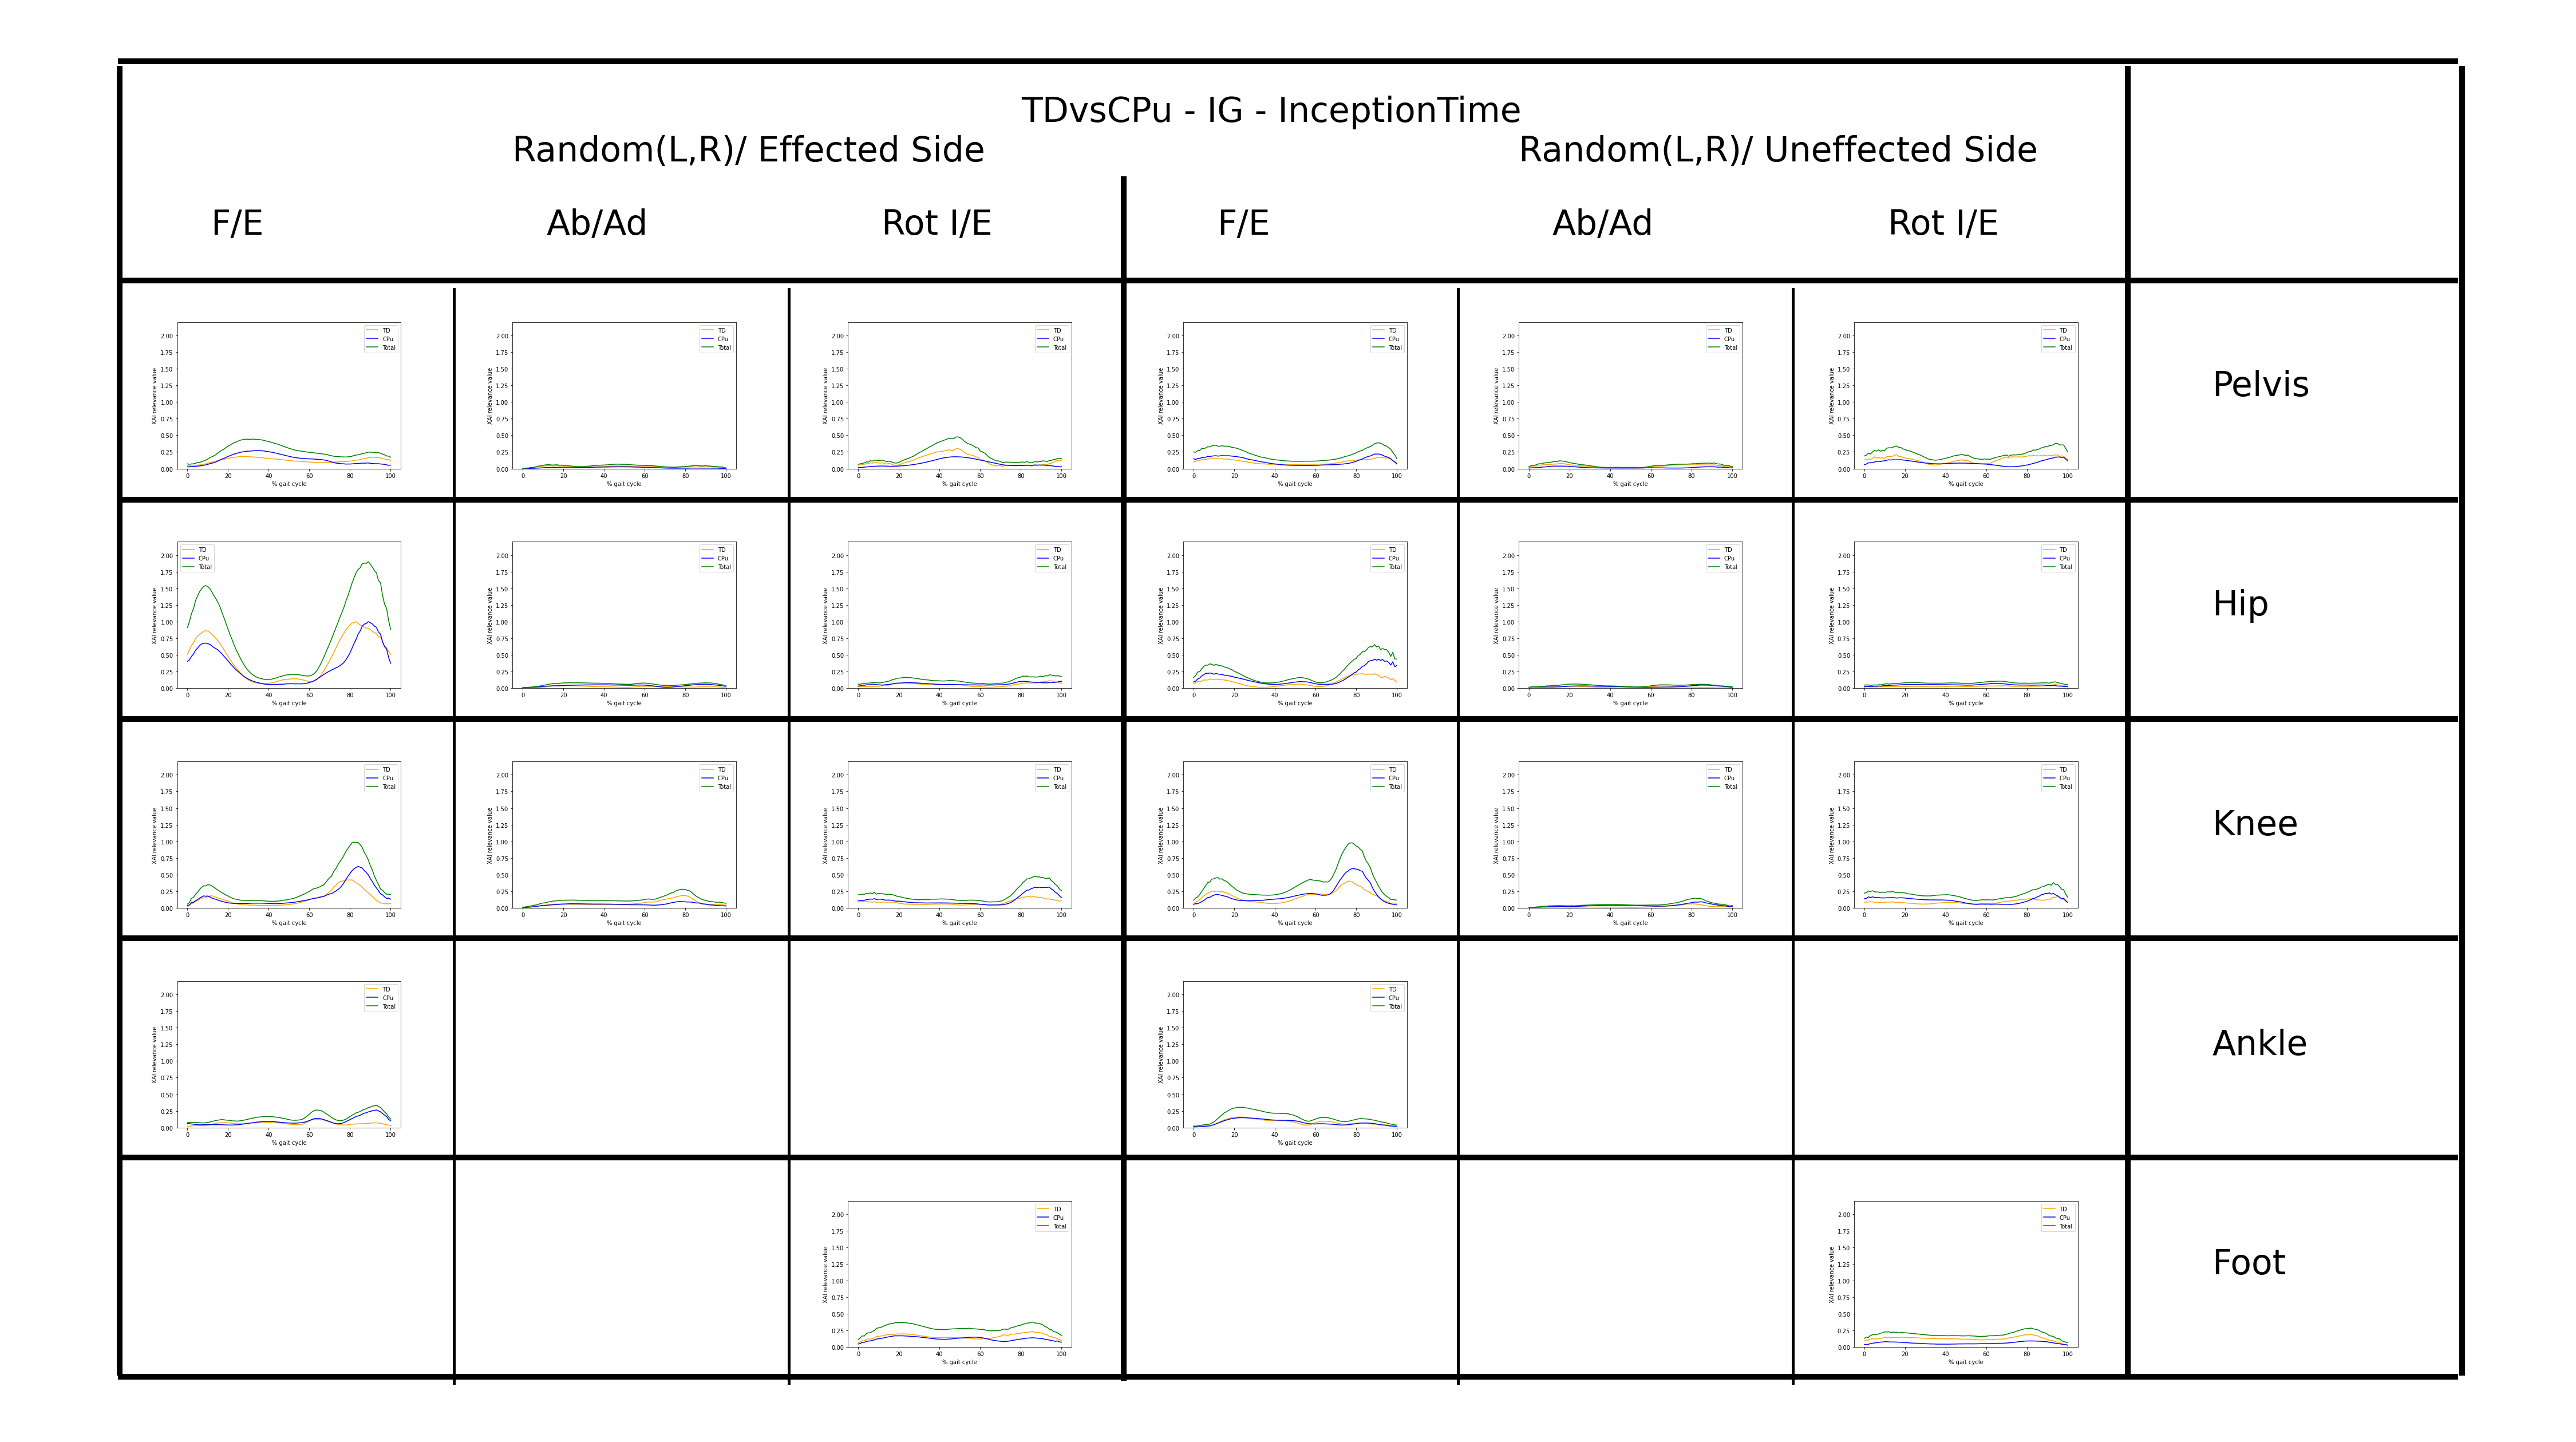

In [15]:
XAI_plot(attrs_0_norm=attrs_0_ResNet_norm,attrs_1_norm=attrs_1_ResNet_norm,RL_list=['Random(L,R)/ Effected Side','Random(L,R)/ Uneffected Side'], D_name ='TDvsCPu',Net_name='ResNet',labels=['TD','CPu'],XAI_method=XAI_method)
XAI_plot(attrs_0_norm=attrs_0_LSTM_norm,attrs_1_norm=attrs_1_LSTM_norm,RL_list=['Random(L,R)/ Effected Side','Random(L,R)/ Uneffected Side'], D_name ='TDvsCPu',Net_name='LSTM',labels=['TD','CPu'],XAI_method=XAI_method)
XAI_plot(attrs_0_norm=attrs_0_InceptionTime_norm,attrs_1_norm=attrs_1_InceptionTime_norm,RL_list=['Random(L,R)/ Effected Side','Random(L,R)/ Uneffected Side'], D_name ='TDvsCPu',Net_name='InceptionTime',labels=['TD','CPu'],XAI_method=XAI_method)

### Pirnt and save the Ranking of relevance value for three nets by angles

In [16]:
print('Ranking of relevance value for three nets',np.array([np.argsort(-attrs_ResNet_norm_angle),np.argsort(-attrs_LSTM_norm_angle) ,np.argsort(-attrs_InceptionTime_norm_angle)]))
os.makedirs('XAI_ranking', exist_ok=True)
np.save('./XAI_ranking/'+str(XAI_method)+'_'+str(D_name)+'_weight', np.array([np.argsort(-attrs_ResNet_norm_angle),np.argsort(-attrs_LSTM_norm_angle) ,np.argsort(-attrs_InceptionTime_norm_angle)]))

Ranking of relevance value for three nets [[ 3 14  6 11 17  9 19  0 10 13  8 21 20  5  2  1 16 12  7 15  4 18]
 [ 3  6 14 11 17  9 19  0  5 13 10  2  8 21  7 15 16 18  1 20 12  4]
 [ 3 17  6 10  0 14 13 11  2 21 19  8 20  9  7  5 16 12  4 18  1 15]]
